In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
df_hr_disease_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\kaggle data\\heart disease\\Heart_Disease_Prediction.csv')

In [3]:
df_hr_disease = df_hr_disease_original.copy()

Data Exploration

In [4]:
df_hr_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
print(list(df_hr_disease.columns))

['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [6]:
df_hr_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df_hr_disease['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [8]:
df_hr_disease_target = df_hr_disease['Heart Disease']

C:\Users\20181588\AppData\Local\Temp\ipykernel_5332\1229538069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease", data=df_hr_disease, palette="bwr")


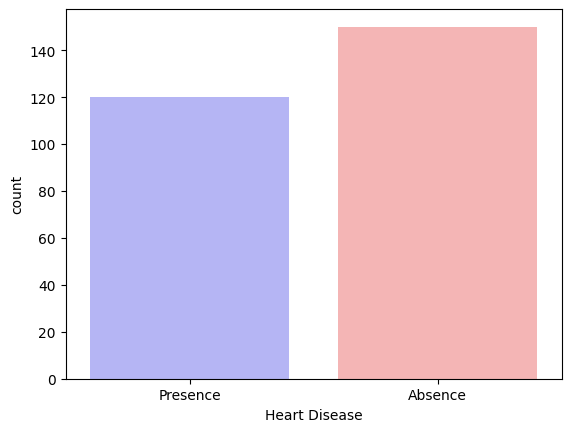

In [9]:
sns.countplot(x="Heart Disease", data=df_hr_disease, palette="bwr")
plt.show()

In [10]:
percentage_presence = (df_hr_disease['Heart Disease'] == 'Presence').mean() * 100
percentage_absence = (df_hr_disease['Heart Disease'] == 'Absence').mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")



Percentage of patients with heart disease: 44.44%
Percentage of patients without heart disease: 55.56%


C:\Users\20181588\AppData\Local\Temp\ipykernel_5332\1682686428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df_hr_disease, palette="mako_r")


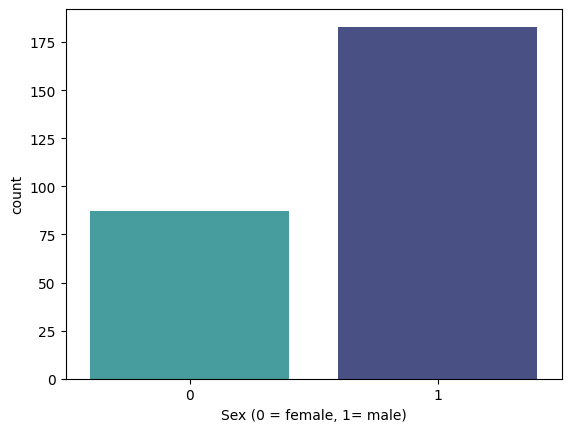

In [11]:
sns.countplot(x='Sex', data=df_hr_disease, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()


In [12]:
countFemale = len(df_hr_disease[df_hr_disease.Sex == 0])
countMale = len(df_hr_disease[df_hr_disease.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df_hr_disease.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df_hr_disease.Sex))*100)))

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


In [13]:
df_hr_disease.groupby('Heart Disease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
Presence,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


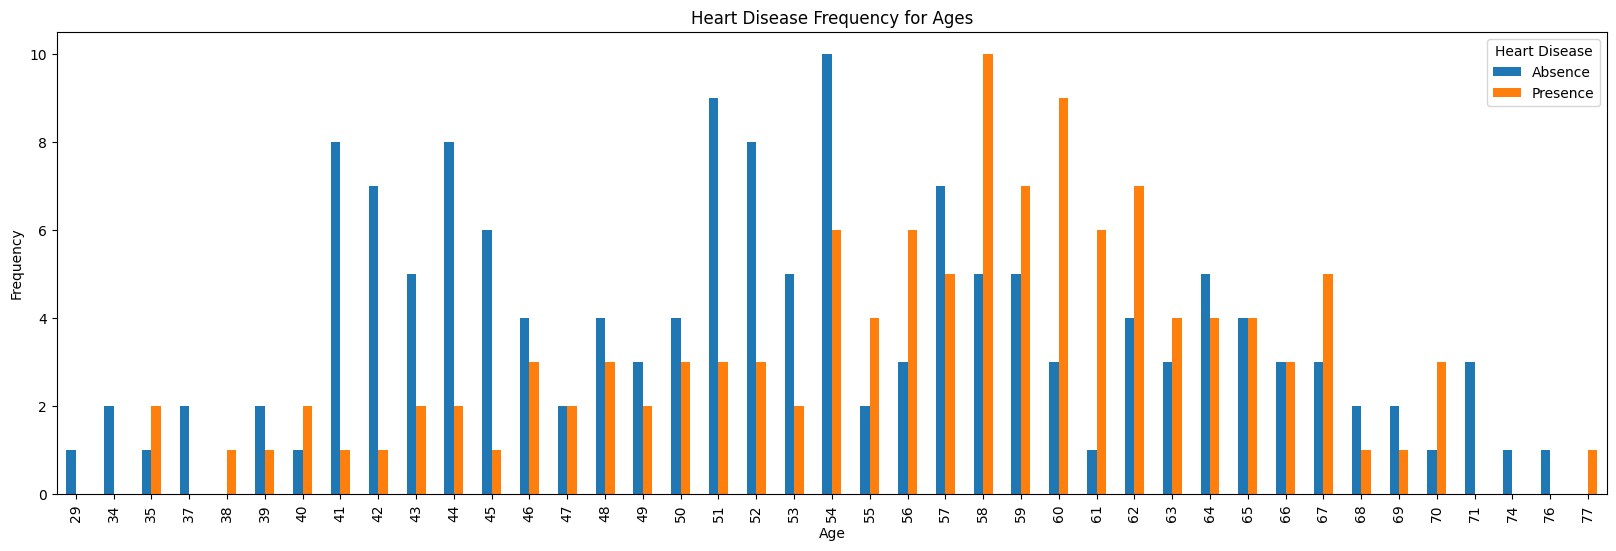

In [14]:
pd.crosstab(df_hr_disease['Age'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

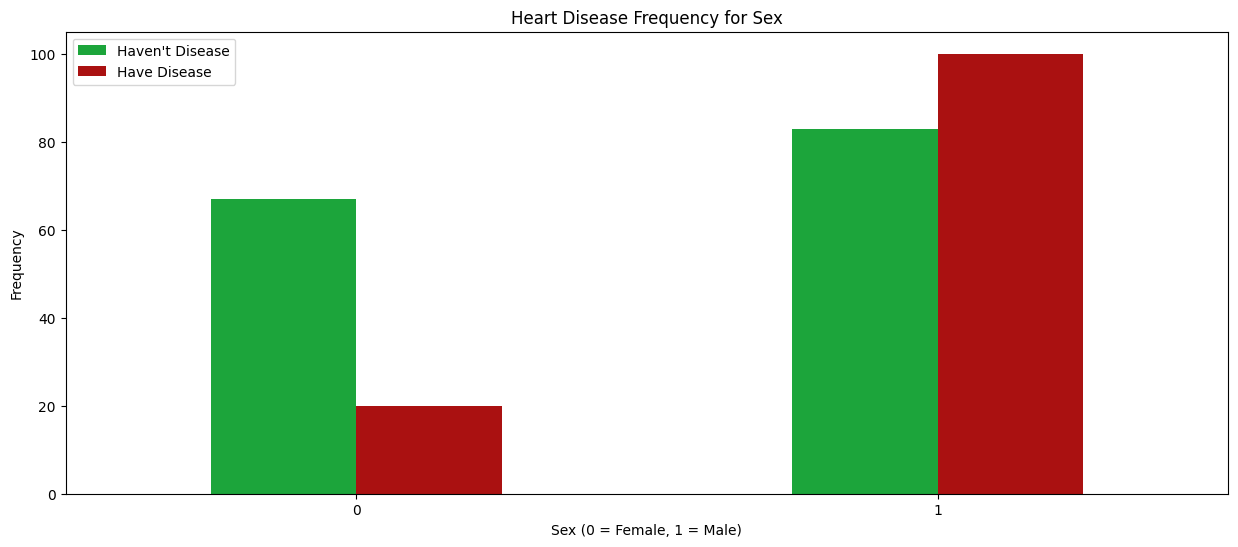

In [15]:
pd.crosstab(df_hr_disease['Sex'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

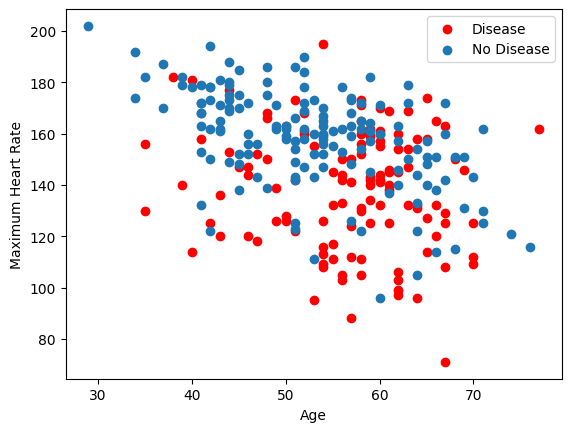

In [16]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=df_hr_disease.Age[df_hr_disease['Heart Disease']=='Presence'], 
            y=df_hr_disease['Max HR'][df_hr_disease['Heart Disease']=='Presence'], c="red")
plt.scatter(x=df_hr_disease.Age[df_hr_disease['Heart Disease']=='Absence'], 
            y=df_hr_disease['Max HR'][df_hr_disease['Heart Disease']=='Absence'])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


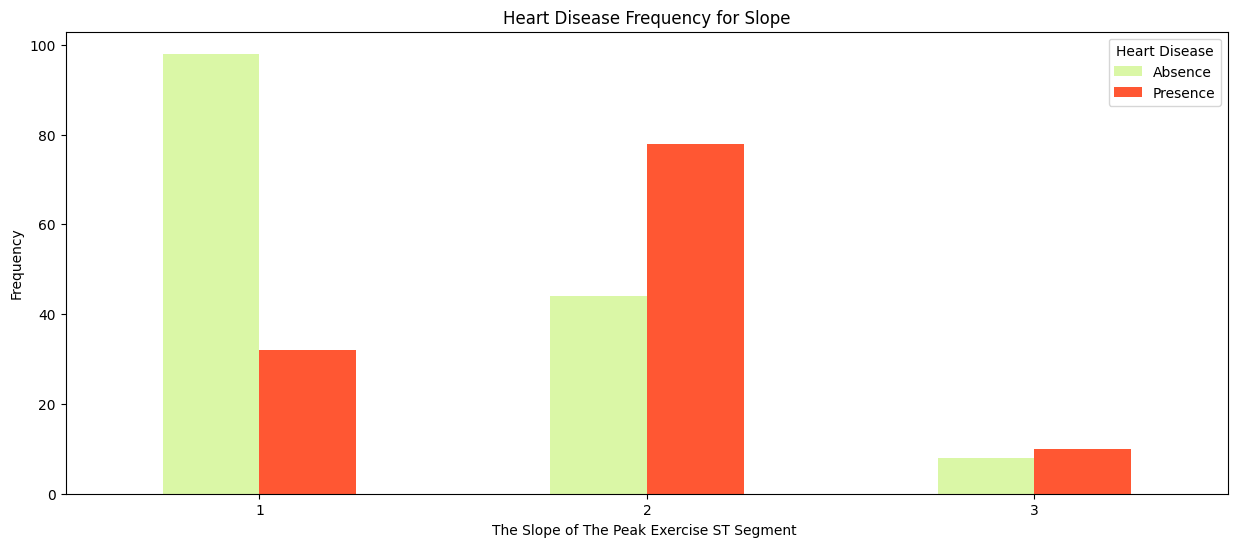

In [17]:
pd.crosstab(df_hr_disease['Slope of ST'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

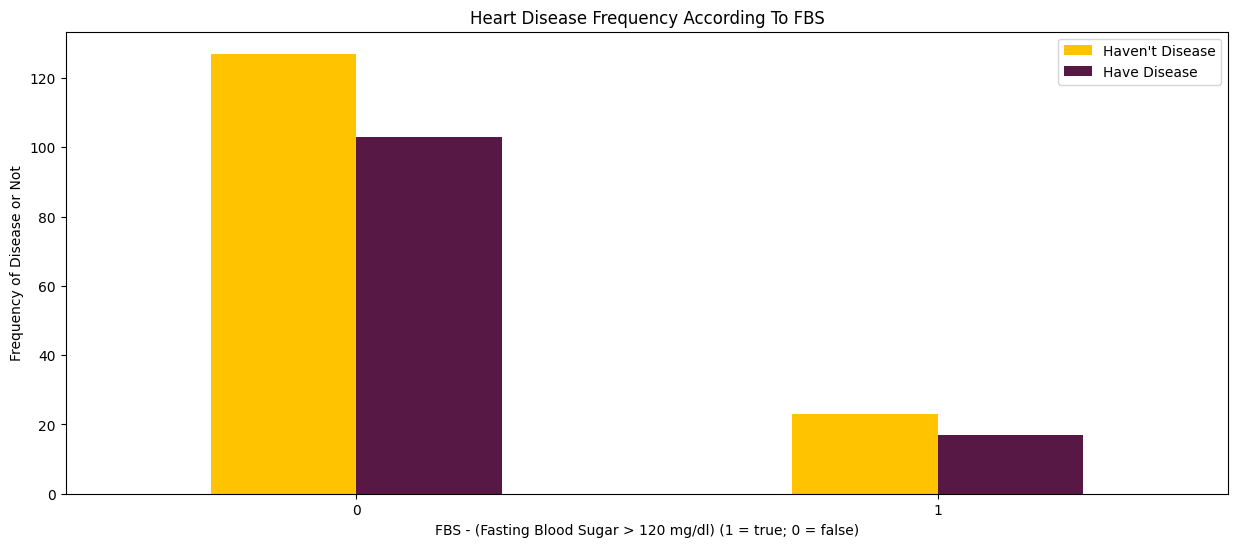

In [18]:
pd.crosstab(df_hr_disease['FBS over 120'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

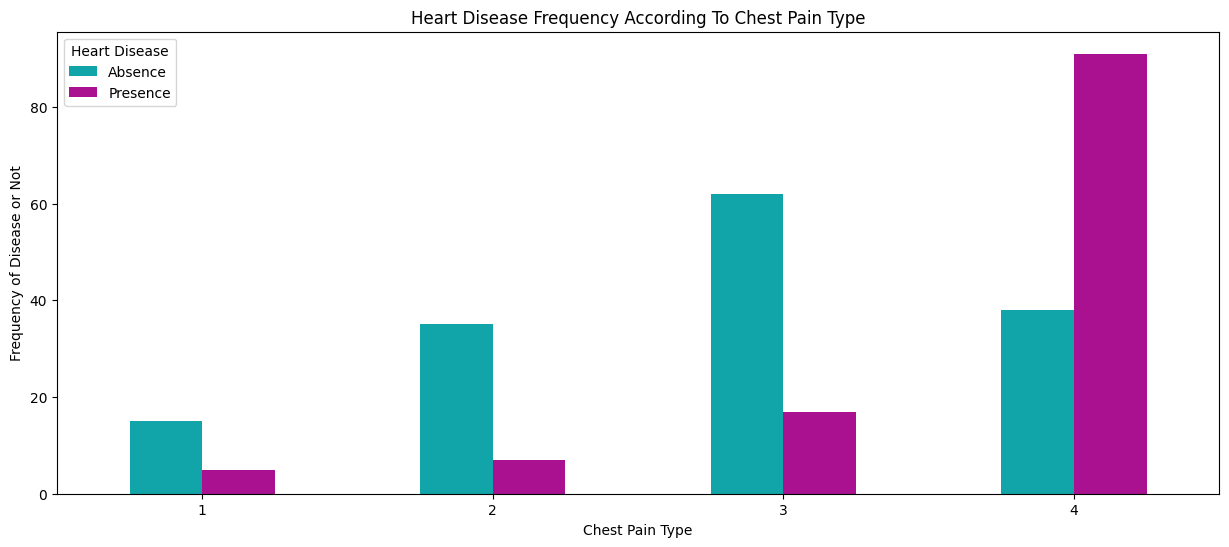

In [19]:
pd.crosstab(df_hr_disease['Chest pain type'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [20]:
# Assuming df_hr_disease is your DataFrame with the heart disease data
# And 'Heart Disease' is the column with values 'Presence' or 'Absence'

# Map 'Presence' to 1 and 'Absence' to 0
df_hr_disease['Heart Disease'] = df_hr_disease['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Now the 'Heart Disease' column will have binary values 1 or 0

In [21]:
df_hr_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [22]:
# Creating dummy variables for the categorical columns
a = pd.get_dummies(df_hr_disease['Chest pain type'], prefix="cp").astype(int)
b = pd.get_dummies(df_hr_disease['Thallium'], prefix="thal").astype(int)
c = pd.get_dummies(df_hr_disease['Slope of ST'], prefix="slope").astype(int)

# Concatenating the dummy variables with the original dataframe
frames = [df_hr_disease, a, b, c]
df_hr_disease = pd.concat(frames, axis=1)

# Display the first few rows of the updated dataframe
df_hr_disease.head()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,0,1,1,0,0,0,1,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,0,1,0,0,0,1,0,1,0
2,57,1,2,124,261,0,0,141,0,0.3,...,0,1,0,0,0,0,1,1,0,0
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,0,1,0,0,1,0,1,0
4,74,0,2,120,269,0,2,121,1,0.2,...,0,1,0,0,1,0,0,1,0,0


In [23]:
# Drop the original categorical columns after creating dummy variables
df_hr_disease = df_hr_disease.drop(columns=['Chest pain type', 'Thallium', 'Slope of ST'])

# Display the first few rows of the updated dataframe
df_hr_disease.head()


,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,130,322,0,2,109,0,2.4,3,...,0,0,0,1,1,0,0,0,1,0
1,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,0,1,0,1,0
2,57,1,124,261,0,0,141,0,0.3,0,...,0,1,0,0,0,0,1,1,0,0
3,64,1,128,263,0,0,105,1,0.2,1,...,0,0,0,1,0,0,1,0,1,0
4,74,0,120,269,0,2,121,1,0.2,1,...,0,1,0,0,1,0,0,1,0,0


Machine Learning Algorithms

Logistic Regression

In [24]:
y = df_hr_disease['Heart Disease'].values
x_data = df_hr_disease.drop(['Heart Disease'], axis = 1)

In [25]:
import numpy as np

# Assuming x_data is your features DataFrame without the 'Heart Disease' column
# Normalize each column in the DataFrame
X = (x_data - x_data.min()) / (x_data.max() - x_data.min())

# Now X is a DataFrame with normalized values


In [26]:
#print(y)
#print(X)

In [27]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create the classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42)
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    #'XGBoost': xgb,
    'Naive Bayes': gnb
}

# Perform 5-fold cross-validation for each classifier
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Lists to store metrics for each fold
    accuracy_scores = []
    auc_scores = []
    sensitivity_scores = []
    specificity_scores = []
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict probabilities if the classifier supports it, else use class predictions
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
        else:
            y_pred_proba = clf.predict(X_test)
            auc = roc_auc_score(y_test, y_pred_proba)
        
        # Predict class labels
        y_pred = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        
        # Specificity calculation
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append metrics to the lists
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
    
    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    mean_sensitivity = np.mean(sensitivity_scores)
    mean_specificity = np.mean(specificity_scores)
    
    # Print the results for the classifier
    print(f"Accuracy: {mean_accuracy:.4f}, AUC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}\n")


Results for Logistic Regression:
Accuracy: 0.8407, AUC: 0.9036, Sensitivity: 0.8083, Specificity: 0.8667

Results for SVM:
Accuracy: 0.8037, AUC: 0.8919, Sensitivity: 0.7500, Specificity: 0.8467

Results for Decision Tree:
Accuracy: 0.7111, AUC: 0.7083, Sensitivity: 0.6833, Specificity: 0.7333

Results for KNN:
Accuracy: 0.8185, AUC: 0.8610, Sensitivity: 0.8083, Specificity: 0.8267

Results for Random Forest:
Accuracy: 0.8148, AUC: 0.8839, Sensitivity: 0.7500, Specificity: 0.8667

Results for Naive Bayes:
Accuracy: 0.8333, AUC: 0.8842, Sensitivity: 0.8083, Specificity: 0.8533



In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings

# This dictionary will hold the ROC curve data
roc_data = {}

# Perform 5-fold cross-validation for each classifier and store ROC data
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
        else:  # Use decision function if predict_proba is not available
            y_pred_proba = clf.decision_function(X_test)
            # Normalize decision function to 0-1
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        
        # Calculate false positives and true positives
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    # Store the mean and the area under the curve for later plotting
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    roc_data[name] = {
        'mean_fpr': mean_fpr,
        'mean_tpr': mean_tpr,
        'mean_auc': mean_auc,
        'std_auc': std_auc
    }
    
# Now roc_data contains the average ROC data for each classifier


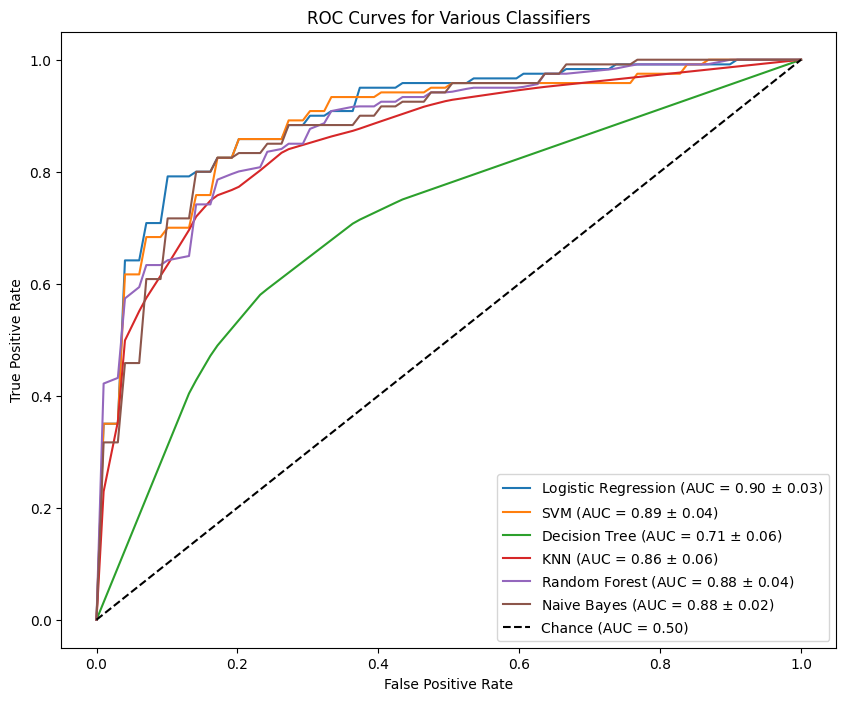

In [29]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name in roc_data:
    data = roc_data[name]
    plt.plot(data['mean_fpr'], data['mean_tpr'], label=f"{name} (AUC = {data['mean_auc']:.2f} $\pm$ {data['std_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Classifiers')
plt.legend(loc='lower right')
plt.show()


In [30]:
"""
from sklearn.metrics import confusion_matrix
import numpy as np

# This dictionary will hold the confusion matrix data
conf_matrix_data = {}

# Perform 5-fold cross-validation for each classifier and store confusion matrix data
for name, clf in classifiers.items():
    cms = []  # Store confusion matrices for each fold

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate confusion matrix and normalize it
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cms.append(cm)

    # Calculate mean confusion matrix
    mean_cm = np.mean(cms, axis=0)
    conf_matrix_data[name] = mean_cm

# Now conf_matrix_data contains the average normalized confusion matrix for each classifier
"""


"\nfrom sklearn.metrics import confusion_matrix\nimport numpy as np\n\n# This dictionary will hold the confusion matrix data\nconf_matrix_data = {}\n\n# Perform 5-fold cross-validation for each classifier and store confusion matrix data\nfor name, clf in classifiers.items():\n    cms = []  # Store confusion matrices for each fold\n\n    for train_index, test_index in cv.split(X, y):\n        X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n        y_train, y_test = y[train_index], y[test_index]\n        \n        clf.fit(X_train, y_train)\n        y_pred = clf.predict(X_test)\n        \n        # Calculate confusion matrix and normalize it\n        cm = confusion_matrix(y_test, y_pred, normalize='true')\n        cms.append(cm)\n\n    # Calculate mean confusion matrix\n    mean_cm = np.mean(cms, axis=0)\n    conf_matrix_data[name] = mean_cm\n\n# Now conf_matrix_data contains the average normalized confusion matrix for each classifier\n"

In [31]:
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False)
    plt.title(f'Normalized Confusion Matrix: {classifier_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot the confusion matrices for each classifier
for name in conf_matrix_data:
    plot_confusion_matrix(conf_matrix_data[name], name)
"""

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Function to plot a confusion matrix\ndef plot_confusion_matrix(cm, classifier_name):\n    plt.figure(figsize=(8, 6))\n    sns.heatmap(cm, annot=True, fmt=".2f", cmap=\'Blues\', cbar=False)\n    plt.title(f\'Normalized Confusion Matrix: {classifier_name}\')\n    plt.ylabel(\'True Label\')\n    plt.xlabel(\'Predicted Label\')\n    plt.show()\n\n# Plot the confusion matrices for each classifier\nfor name in conf_matrix_data:\n    plot_confusion_matrix(conf_matrix_data[name], name)\n'

results per gender

In [32]:
import warnings
import numpy as np
import pandas as pd  # Assuming you're using pandas for your data manipulation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from xgboost import XGBClassifier

# To prevent unnecessary warnings from being displayed
warnings.filterwarnings('ignore')

# Assuming your dataset is loaded into a pandas DataFrame and split into features X and labels y
# X, y = ...

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42)
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()

# Uncomment the following line if you have XGBoost installed and want to include it
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    # 'XGBoost': xgb,  # Uncomment this line if including XGBoost
    'Naive Bayes': gnb
}

# Perform 5-fold cross-validation for each classifier
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Lists to store overall metrics for each fold
    accuracy_scores = []
    auc_scores = []
    sensitivity_scores = []
    specificity_scores = []
    
    # Lists to store gender-specific metrics for each fold
    gender_scores = {
        'Male': {'Accuracy': [], 'AUC': [], 'Sensitivity': [], 'Specificity': []},
        'Female': {'Accuracy': [], 'AUC': [], 'Sensitivity': [], 'Specificity': []}
    }
    
    for train_index, test_index in cv.split(X, y):
        # Split the dataset into the training set and the test set
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Remove the 'Sex' column from the training set
        X_train = X_train.drop(columns=['Sex'])
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict probabilities if the classifier supports it, else use class predictions
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test.drop(columns=['Sex']))[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
        else:
            y_pred_proba = clf.predict(X_test.drop(columns=['Sex']))
            auc = roc_auc_score(y_test, y_pred_proba)
        
        # Predict class labels
        y_pred = clf.predict(X_test.drop(columns=['Sex']))
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        
        # Specificity calculation
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append metrics to the lists
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
        
        # Split the test set by gender
        X_test_male = X_test[X_test['Sex'] == 1]
        y_test_male = y_test[X_test['Sex'] == 1]
        X_test_female = X_test[X_test['Sex'] == 0]
        y_test_female = y_test[X_test['Sex'] == 0]
        
        # Make predictions for each gender
        y_pred_male = clf.predict(X_test_male.drop(columns=['Sex']))
        y_pred_female = clf.predict(X_test_female.drop(columns=['Sex']))
        
        # Calculate and store gender-specific metrics
        for gender, X_gender, y_gender, y_pred_gender in zip(['Male', 'Female'], [X_test_male, X_test_female], [y_test_male, y_test_female], [y_pred_male, y_pred_female]):
            gender_scores[gender]['Accuracy'].append(accuracy_score(y_gender, y_pred_gender))
            
            if hasattr(clf, "predict_proba"):
                y_pred_proba_gender = clf.predict_proba(X_gender.drop(columns=['Sex']))[:, 1]
                gender_scores[gender]['AUC'].append(roc_auc_score(y_gender, y_pred_proba_gender))
            else:
                y_pred_proba_gender = clf.predict(X_gender.drop(columns=['Sex']))
                gender_scores[gender]['AUC'].append(roc_auc_score(y_gender, y_pred_proba_gender))
            
            gender_scores[gender]['Sensitivity'].append(recall_score(y_gender, y_pred_gender))
            
            tn_gender, fp_gender, fn_gender, tp_gender = confusion_matrix(y_gender, y_pred_gender).ravel()
            gender_scores[gender]['Specificity'].append(tn_gender / (tn_gender + fp_gender))
    
    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    mean_sensitivity = np.mean(sensitivity_scores)
    mean_specificity = np.mean(specificity_scores)
    
    # Print the results for the classifier
    print(f"Overall - Accuracy: {mean_accuracy:.4f}, AUC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}")
    
    # Calculate mean metrics for each gender and print
    for gender in ['Male', 'Female']:
        mean_accuracy_gender = np.mean(gender_scores[gender]['Accuracy'])
        mean_auc_gender = np.mean(gender_scores[gender]['AUC'])
        mean_sensitivity_gender = np.mean(gender_scores[gender]['Sensitivity'])
        mean_specificity_gender = np.mean(gender_scores[gender]['Specificity'])
        
        print(f"{gender} - Accuracy: {mean_accuracy_gender:.4f}, AUC: {mean_auc_gender:.4f}, Sensitivity: {mean_sensitivity_gender:.4f}, Specificity: {mean_specificity_gender:.4f}")


Results for Logistic Regression:
Overall - Accuracy: 0.8407, AUC: 0.8947, Sensitivity: 0.8167, Specificity: 0.8600
Male - Accuracy: 0.8169, AUC: 0.8670, Sensitivity: 0.8211, Specificity: 0.8105
Female - Accuracy: 0.9062, AUC: 0.9448, Sensitivity: 0.8200, Specificity: 0.9361
Results for SVM:
Overall - Accuracy: 0.8259, AUC: 0.8892, Sensitivity: 0.7917, Specificity: 0.8533
Male - Accuracy: 0.7887, AUC: 0.8536, Sensitivity: 0.7816, Specificity: 0.7931
Female - Accuracy: 0.9216, AUC: 0.9570, Sensitivity: 0.8867, Specificity: 0.9361
Results for Decision Tree:
Overall - Accuracy: 0.7222, AUC: 0.7183, Sensitivity: 0.6833, Specificity: 0.7533
Male - Accuracy: 0.7122, AUC: 0.7156, Sensitivity: 0.6709, Specificity: 0.7603
Female - Accuracy: 0.7273, AUC: 0.7408, Sensitivity: 0.7433, Specificity: 0.7383
Results for KNN:
Overall - Accuracy: 0.8148, AUC: 0.8282, Sensitivity: 0.7833, Specificity: 0.8400
Male - Accuracy: 0.7793, AUC: 0.8058, Sensitivity: 0.7824, Specificity: 0.7770
Female - Accuracy: 

sdg - getting more data

SDV CTGAN 

In [33]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
ctgan = CTGANSynthesizer(metadata=metadata, epochs=5, verbose=True)

# Fit the CTGAN model to your data
ctgan.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_ctgan = ctgan.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_ctgan.head())

Gen. (0.81) | Discrim. (-0.15): 100%|██████████| 5/5 [00:00<00:00, 11.74it/s]


   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   63    1  160          311             1            1     178   
1   58    0  185          336             0            0     201   
2   69    1  133          244             1            2     127   
3   60    0  168          240             1            2     173   
4   45    0  175          245             0            2     150   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            0.2                        0  ...     0     1   
1                0            0.4                        1  ...     0     0   
2                1            1.0                        0  ...     0     1   
3                1            2.3                        2  ...     1     0   
4                0            0.4                        3  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     1     0       1       0       0        1   

In [48]:
ctgan.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,tensor(0.7685),tensor(-0.0255)
1,1,tensor(0.8266),tensor(-0.0776)
2,2,tensor(0.8652),tensor(-0.0807)
3,3,tensor(0.8425),tensor(-0.1361)
4,4,tensor(0.8061),tensor(-0.1451)


In [34]:
synthetic_data_ctgan.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,63,1,160,311,1,1,178,0,0.2,0,...,0,1,1,0,1,0,0,1,1,1
1,58,0,185,336,0,0,201,0,0.4,1,...,0,0,0,1,1,0,0,1,0,0
2,69,1,133,244,1,2,127,1,1.0,0,...,0,1,1,0,1,1,1,1,1,0
3,60,0,168,240,1,2,173,1,2.3,2,...,1,0,0,1,1,1,0,1,0,1
4,45,0,175,245,0,2,150,0,0.4,3,...,0,0,1,0,1,0,1,0,1,0


In [49]:
synthetic_data_ctgan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Sex                      1000 non-null   int64  
 2   BP                       1000 non-null   int64  
 3   Cholesterol              1000 non-null   int64  
 4   FBS over 120             1000 non-null   int64  
 5   EKG results              1000 non-null   int64  
 6   Max HR                   1000 non-null   int64  
 7   Exercise angina          1000 non-null   int64  
 8   ST depression            1000 non-null   float64
 9   Number of vessels fluro  1000 non-null   int64  
 10  Heart Disease            1000 non-null   int64  
 11  cp_1                     1000 non-null   int32  
 12  cp_2                     1000 non-null   int32  
 13  cp_3                     1000 non-null   int32  
 14  cp_4                     

In [50]:
synthetic_data_ctgan['Heart Disease'].value_counts()

Heart Disease
0    541
1    459
Name: count, dtype: int64

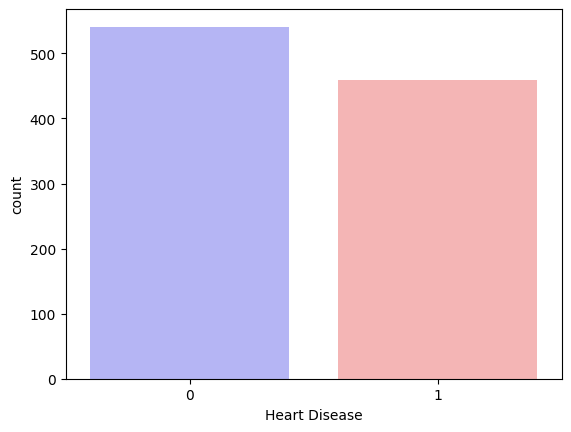

In [51]:
sns.countplot(x="Heart Disease", data=synthetic_data_ctgan, palette="bwr")
plt.show()

In [53]:
percentage_presence = (synthetic_data_ctgan['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_ctgan['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 45.90%
Percentage of patients without heart disease: 54.10%


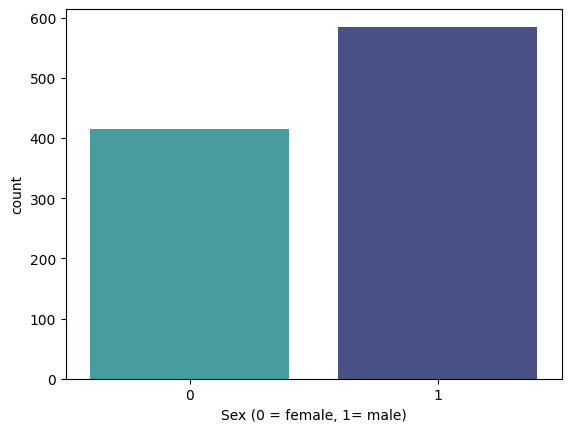

In [54]:
sns.countplot(x='Sex', data=synthetic_data_ctgan, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [55]:
countFemale = len(synthetic_data_ctgan[synthetic_data_ctgan.Sex == 0])
countMale = len(synthetic_data_ctgan[synthetic_data_ctgan.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_ctgan.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_ctgan.Sex))*100)))

Percentage of Female Patients: 41.50%
Percentage of Male Patients: 58.50%


In [56]:
synthetic_data_ctgan.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,50.321627,0.598891,157.848429,274.595194,0.510166,1.121996,166.073937,0.482440,2.379482,1.223660,0.399261,0.369686,0.573013,0.515712,0.541590,0.434381,0.489834,0.526802,0.508318,0.502773
1,51.098039,0.568627,155.923747,273.071895,0.535948,1.043573,164.241830,0.544662,2.393246,1.326797,0.383442,0.387800,0.540305,0.575163,0.551198,0.433551,0.525054,0.488017,0.492375,0.555556


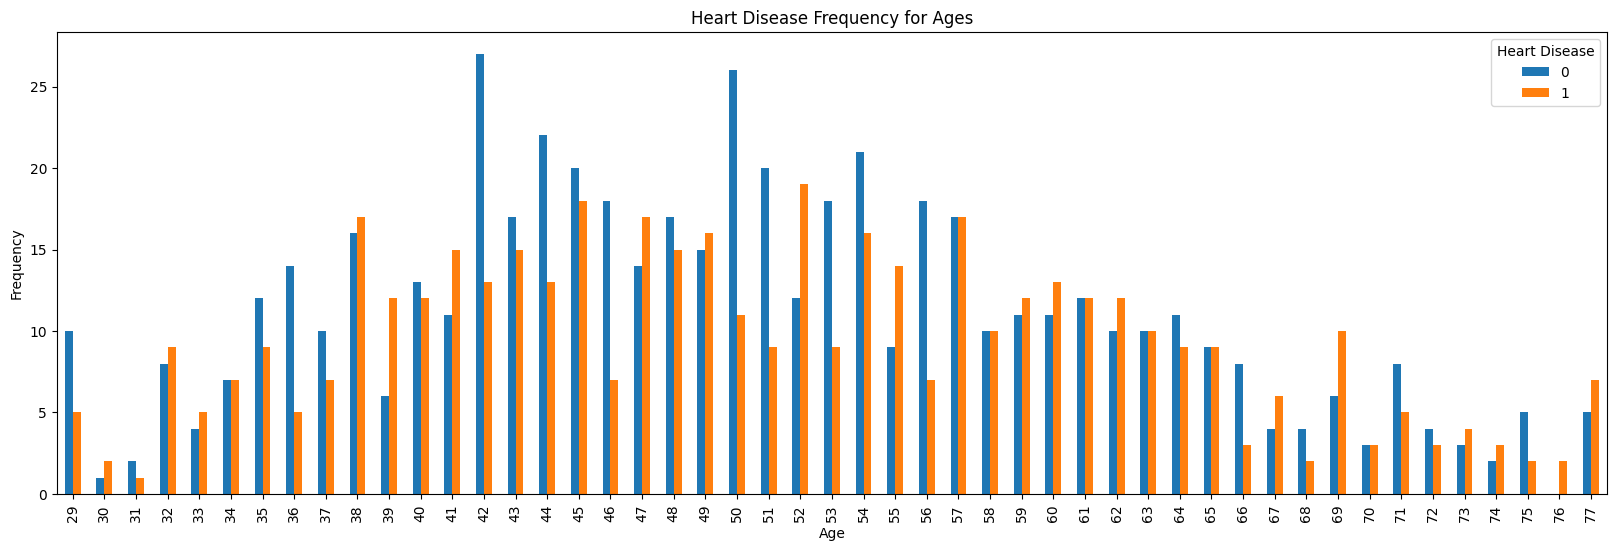

In [57]:
pd.crosstab(synthetic_data_ctgan['Age'],synthetic_data_ctgan['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

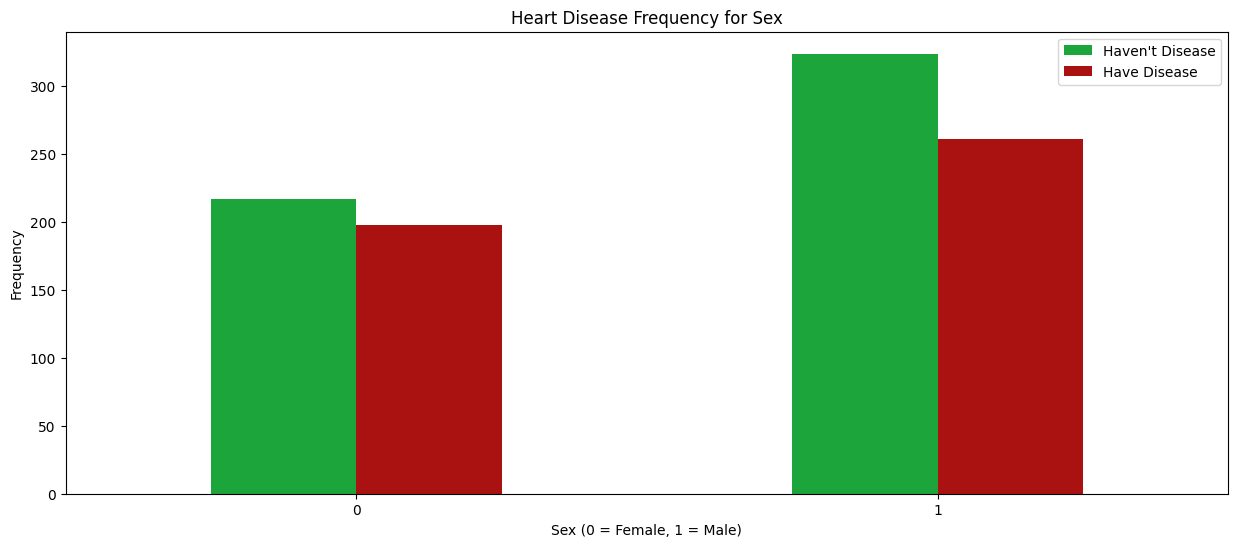

In [58]:
pd.crosstab(synthetic_data_ctgan['Sex'],synthetic_data_ctgan['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

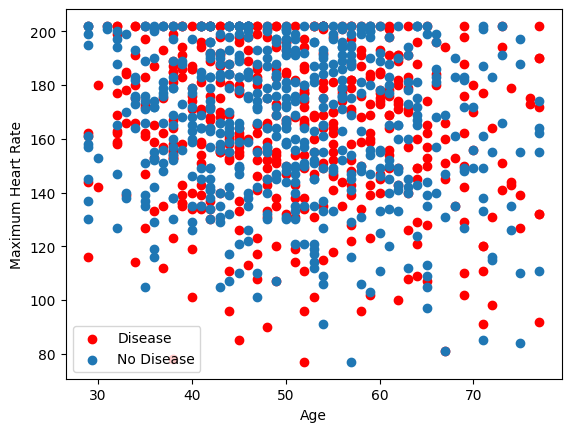

In [60]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_ctgan.Age[synthetic_data_ctgan['Heart Disease']==1], 
            y=synthetic_data_ctgan['Max HR'][synthetic_data_ctgan['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_ctgan.Age[synthetic_data_ctgan['Heart Disease']==0], 
            y=synthetic_data_ctgan['Max HR'][synthetic_data_ctgan['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


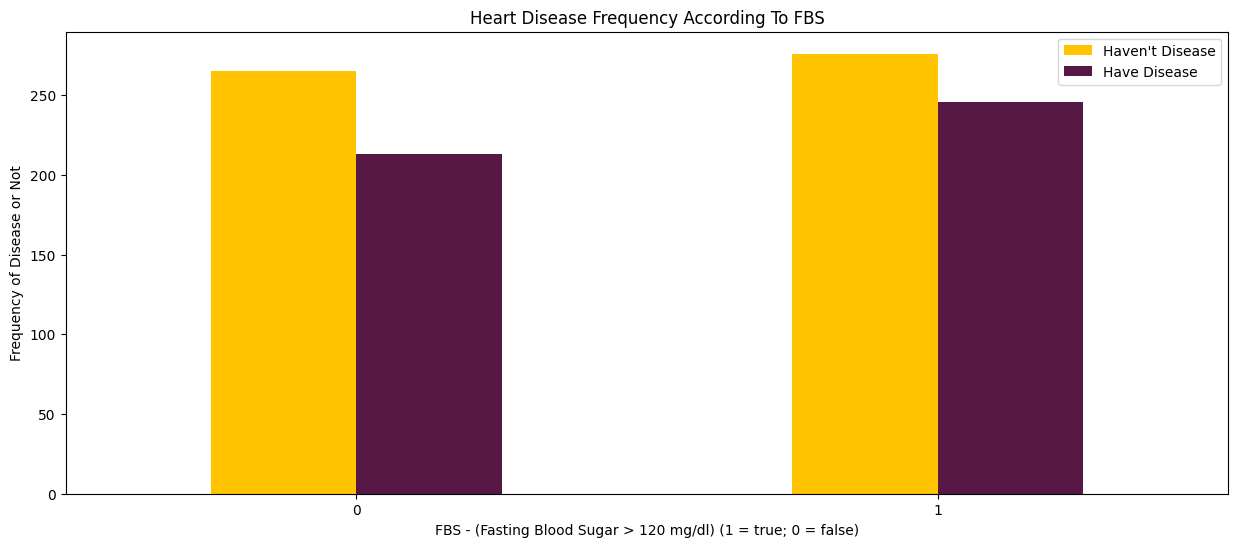

In [62]:
pd.crosstab(synthetic_data_ctgan['FBS over 120'],synthetic_data_ctgan['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

SDV Gaussian Coupola 

In [37]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
coupGauss = GaussianCopulaSynthesizer(metadata=metadata)

# Fit the CTGAN model to your data
coupGauss.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_coupGauss = coupGauss.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_coupGauss.head())

   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   57    1  123          288             0            0     128   
1   53    1  123          182             0            0     169   
2   51    1  123          171             0            0     168   
3   47    1  123          350             0            0     134   
4   48    0  123          264             0            0     152   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            1.0                        0  ...     0     0   
1                0            2.0                        0  ...     1     0   
2                0            2.5                        1  ...     0     0   
3                1            3.5                        0  ...     0     0   
4                0            0.8                        0  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     0     1       0       0       1        0   

In [45]:
coupGauss.get_learned_distributions()

{'Age': {'distribution': 'beta',
  'learned_parameters': {'loc': 21.42263510498467,
   'scale': 59.782375765265265,
   'a': 5.381093925349333,
   'b': 4.367237255534249}},
 'Sex': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0038196128745667467,
   'scale': 0.9944246194254931,
   'a': 0.9343480142479993,
   'b': 0.9663370934288618}},
 'BP': {'distribution': 'beta',
  'learned_parameters': {'loc': 122.99999999680051,
   'scale': 162.1050092376899,
   'a': 0.19452249405807387,
   'b': 68.48942734315185}},
 'Cholesterol': {'distribution': 'beta',
  'learned_parameters': {'loc': 125.41158381523343,
   'scale': 449.78248498472266,
   'a': 2.1900686050571636,
   'b': 5.819983935028095}},
 'FBS over 120': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0031949961980615076,
   'scale': 0.9953315061484289,
   'a': 0.9611971648964233,
   'b': 0.9581006421223468}},
 'EKG results': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.001410746902108024,
   'scale': 0

In [64]:
synthetic_data_coupGauss.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,57,1,123,288,0,0,128,0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
1,53,1,123,182,0,0,169,0,2.0,0,...,1,0,0,0,0,0,0,0,1,1
2,51,1,123,171,0,0,168,0,2.5,1,...,0,0,1,1,0,0,1,1,0,0
3,47,1,123,350,0,0,134,1,3.5,0,...,0,0,0,1,0,0,1,1,1,1
4,48,0,123,264,0,0,152,0,0.8,0,...,0,0,1,0,1,0,1,1,0,0


In [65]:
synthetic_data_coupGauss['Heart Disease'].value_counts()

Heart Disease
0    582
1    418
Name: count, dtype: int64

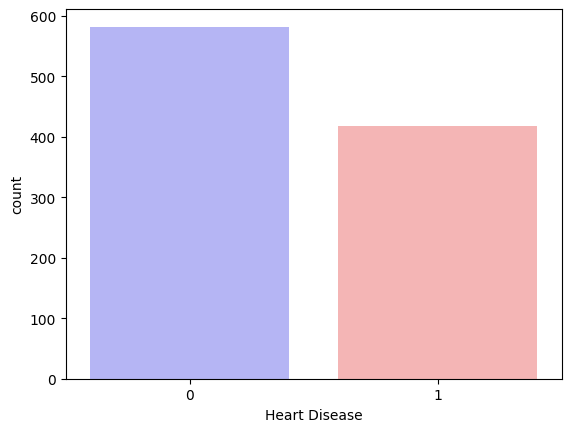

In [66]:
sns.countplot(x="Heart Disease", data=synthetic_data_coupGauss, palette="bwr")
plt.show()

In [67]:
percentage_presence = (synthetic_data_coupGauss['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_coupGauss['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 41.80%
Percentage of patients without heart disease: 58.20%


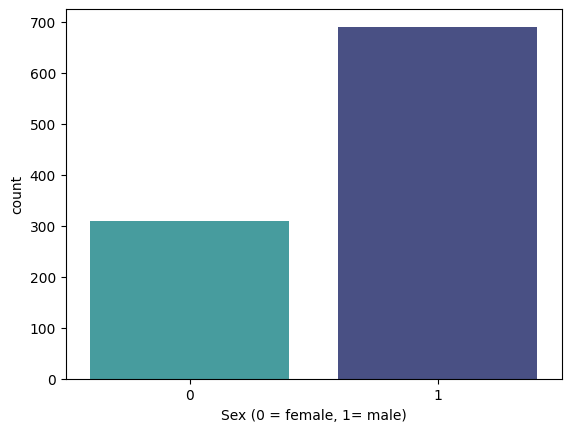

In [68]:
sns.countplot(x='Sex', data=synthetic_data_coupGauss, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [69]:
countFemale = len(synthetic_data_coupGauss[synthetic_data_coupGauss.Sex == 0])
countMale = len(synthetic_data_coupGauss[synthetic_data_coupGauss.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_coupGauss.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_coupGauss.Sex))*100)))

Percentage of Female Patients: 31.00%
Percentage of Male Patients: 69.00%


In [70]:
synthetic_data_coupGauss.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,54.166667,0.632302,123.331615,246.886598,0.144330,1.010309,154.945017,0.268041,1.118729,0.659794,0.132302,0.189003,0.305842,0.396907,0.659794,0.072165,0.336770,0.553265,0.403780,0.080756
1,55.736842,0.770335,123.629187,253.605263,0.157895,1.131579,143.435407,0.444976,1.627273,0.691388,0.119617,0.141148,0.248804,0.633971,0.418660,0.071770,0.492823,0.423445,0.521531,0.083732


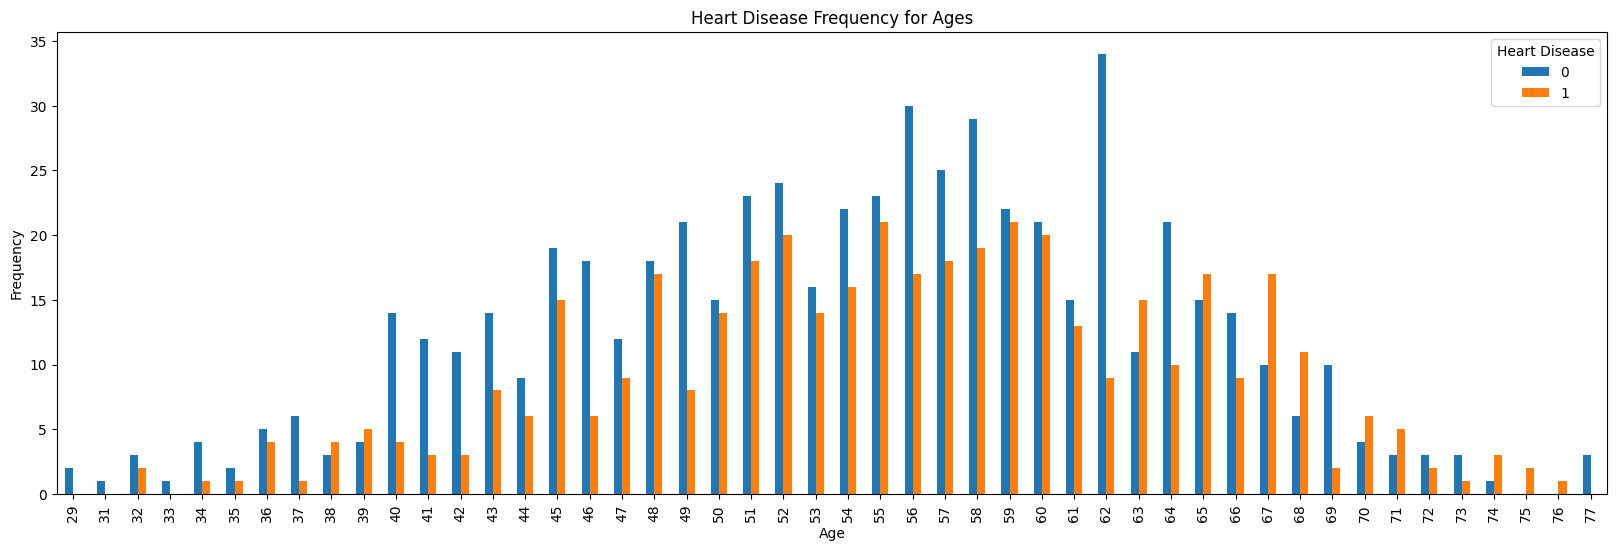

In [71]:
pd.crosstab(synthetic_data_coupGauss['Age'],synthetic_data_coupGauss['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

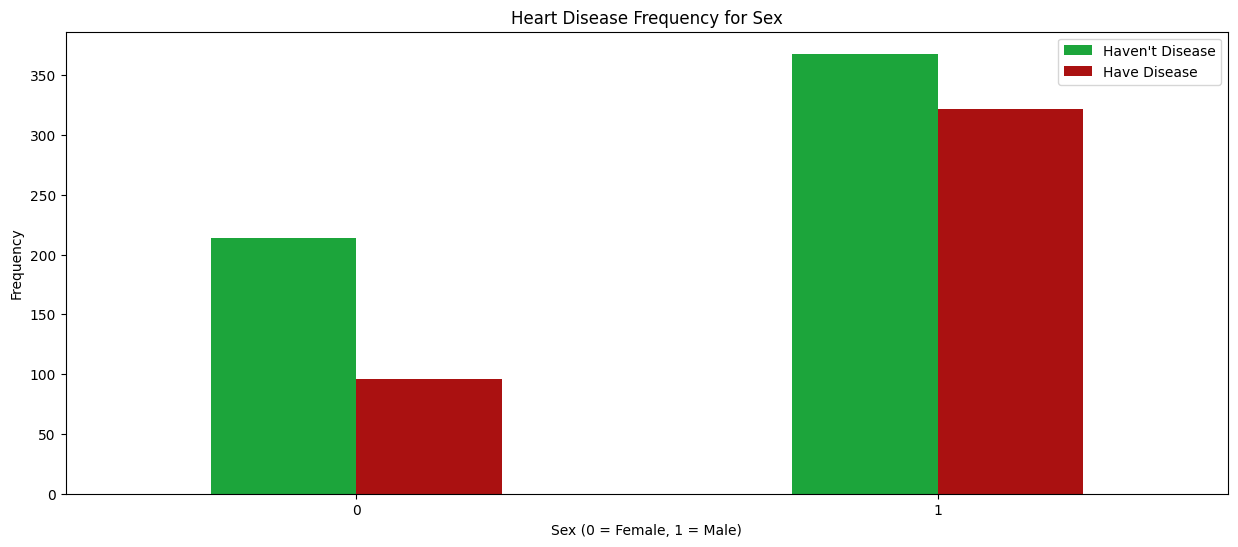

In [72]:
pd.crosstab(synthetic_data_coupGauss['Sex'],synthetic_data_coupGauss['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

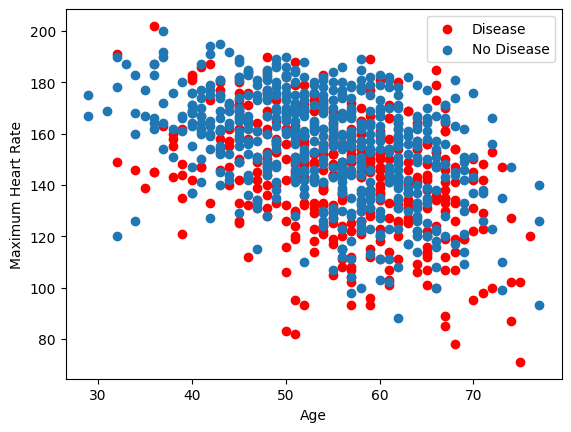

In [73]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_coupGauss.Age[synthetic_data_coupGauss['Heart Disease']==1], 
            y=synthetic_data_coupGauss['Max HR'][synthetic_data_coupGauss['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_coupGauss.Age[synthetic_data_coupGauss['Heart Disease']==0], 
            y=synthetic_data_coupGauss['Max HR'][synthetic_data_coupGauss['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


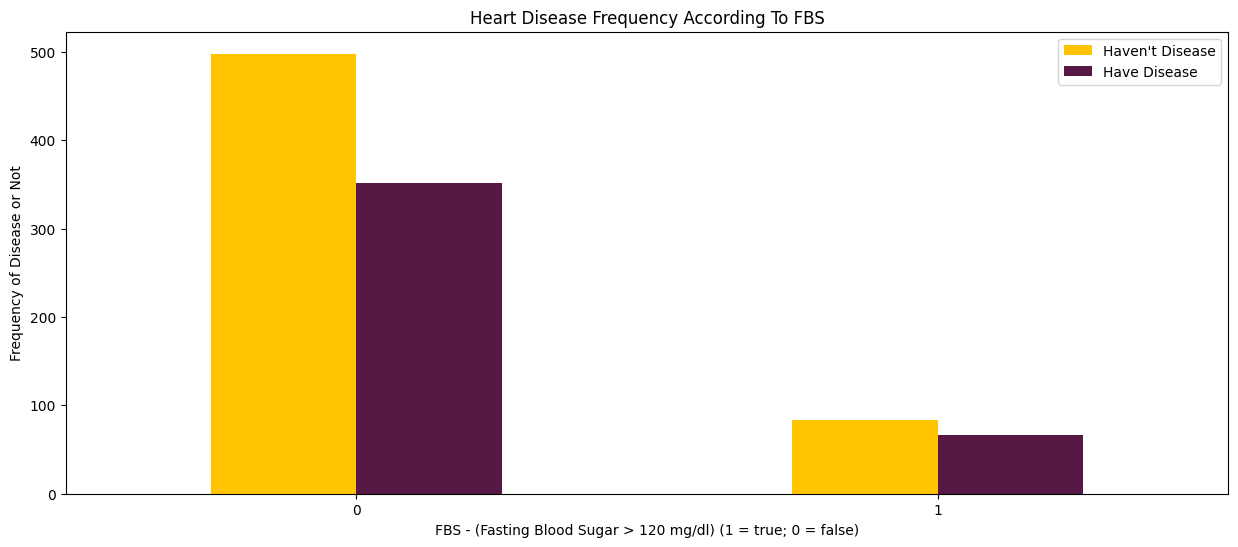

In [74]:
pd.crosstab(synthetic_data_coupGauss['FBS over 120'],synthetic_data_coupGauss['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Synthetic data generated by Gaussian Coupola Method seems to be very realistic to the real one

SDV Coupola GAN

In [39]:
from sdv.single_table import CopulaGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
coupGAN = CopulaGANSynthesizer(metadata=metadata, epochs=5, verbose=True)

# Fit the CTGAN model to your data
coupGAN.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_coupGAN = coupGAN.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_coupGAN.head())

Gen. (0.83) | Discrim. (-0.07): 100%|██████████| 5/5 [00:00<00:00, 17.29it/s]


   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   57    1  123          328             0            1     183   
1   57    0  123          368             0            2     191   
2   54    1  123          401             1            2     175   
3   57    0  168          343             1            2     179   
4   57    1  173          144             0            2     124   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                1            0.2                        0  ...     0     1   
1                0            4.2                        1  ...     1     0   
2                0            0.1                        0  ...     0     1   
3                0            0.1                        2  ...     1     0   
4                0            0.1                        2  ...     0     1   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     1     0       1       0       0        1   

In [46]:
coupGAN.get_learned_distributions()

{'Age': {'distribution': 'beta',
  'learned_parameters': {'loc': 21.42263510498467,
   'scale': 59.782375765265265,
   'a': 5.381093925349333,
   'b': 4.367237255534249}},
 'BP': {'distribution': 'beta',
  'learned_parameters': {'loc': 122.99999999680051,
   'scale': 162.1050092376899,
   'a': 0.19452249405807387,
   'b': 68.48942734315185}},
 'Cholesterol': {'distribution': 'beta',
  'learned_parameters': {'loc': 125.41158381523343,
   'scale': 449.78248498472266,
   'a': 2.1900686050571636,
   'b': 5.819983935028095}},
 'Max HR': {'distribution': 'beta',
  'learned_parameters': {'loc': -112.51948823199255,
   'scale': 325.6059504846236,
   'a': 24.402514400991734,
   'b': 5.90194242635072}},
 'ST depression': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.09999999999999999,
   'scale': 6.37706732934635,
   'a': 0.7948764292766151,
   'b': 3.2223617171896435}}}

In [47]:
coupGAN.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,tensor(0.8288),tensor(0.0228)
1,1,tensor(0.8145),tensor(-0.0446)
2,2,tensor(0.8495),tensor(-0.0557)
3,3,tensor(0.8355),tensor(-0.0420)
4,4,tensor(0.8293),tensor(-0.0706)


In [75]:
synthetic_data_coupGAN.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,57,1,123,328,0,1,183,1,0.2,0,...,0,1,1,0,1,0,0,1,1,1
1,57,0,123,368,0,2,191,0,4.2,1,...,1,0,0,1,1,0,0,0,1,1
2,54,1,123,401,1,2,175,0,0.1,0,...,0,1,1,0,1,1,1,1,0,0
3,57,0,168,343,1,2,179,0,0.1,2,...,1,0,0,1,1,1,0,1,0,1
4,57,1,173,144,0,2,124,0,0.1,2,...,0,1,0,0,0,1,0,0,1,0


In [76]:
synthetic_data_coupGAN['Heart Disease'].value_counts()

Heart Disease
0    546
1    454
Name: count, dtype: int64

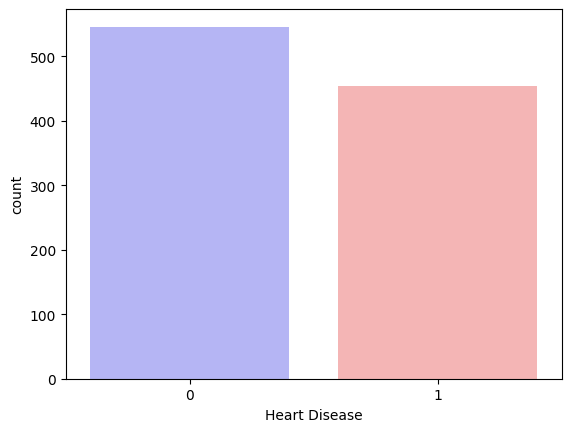

In [77]:
sns.countplot(x="Heart Disease", data=synthetic_data_coupGAN, palette="bwr")
plt.show()

In [78]:
percentage_presence = (synthetic_data_coupGAN['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_coupGAN['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 45.40%
Percentage of patients without heart disease: 54.60%


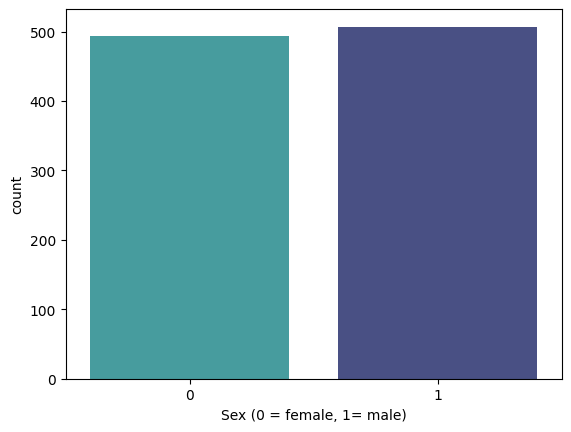

In [79]:
sns.countplot(x='Sex', data=synthetic_data_coupGAN, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [80]:
countFemale = len(synthetic_data_coupGAN[synthetic_data_coupGAN.Sex == 0])
countMale = len(synthetic_data_coupGAN[synthetic_data_coupGAN.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_coupGAN.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_coupGAN.Sex))*100)))

Percentage of Female Patients: 49.30%
Percentage of Male Patients: 50.70%


this is great that coupola GAN synthetizer balanced gender data on its own!

In [81]:
synthetic_data_coupGAN.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,57.256410,0.516484,141.007326,339.377289,0.441392,1.139194,147.018315,0.459707,1.901832,1.520147,0.406593,0.556777,0.417582,0.465201,0.428571,0.448718,0.476190,0.540293,0.490842,0.437729
1,58.070485,0.495595,140.374449,341.640969,0.427313,1.081498,148.546256,0.482379,1.803304,1.475771,0.405286,0.526432,0.378855,0.533040,0.458150,0.491189,0.524229,0.455947,0.484581,0.444934


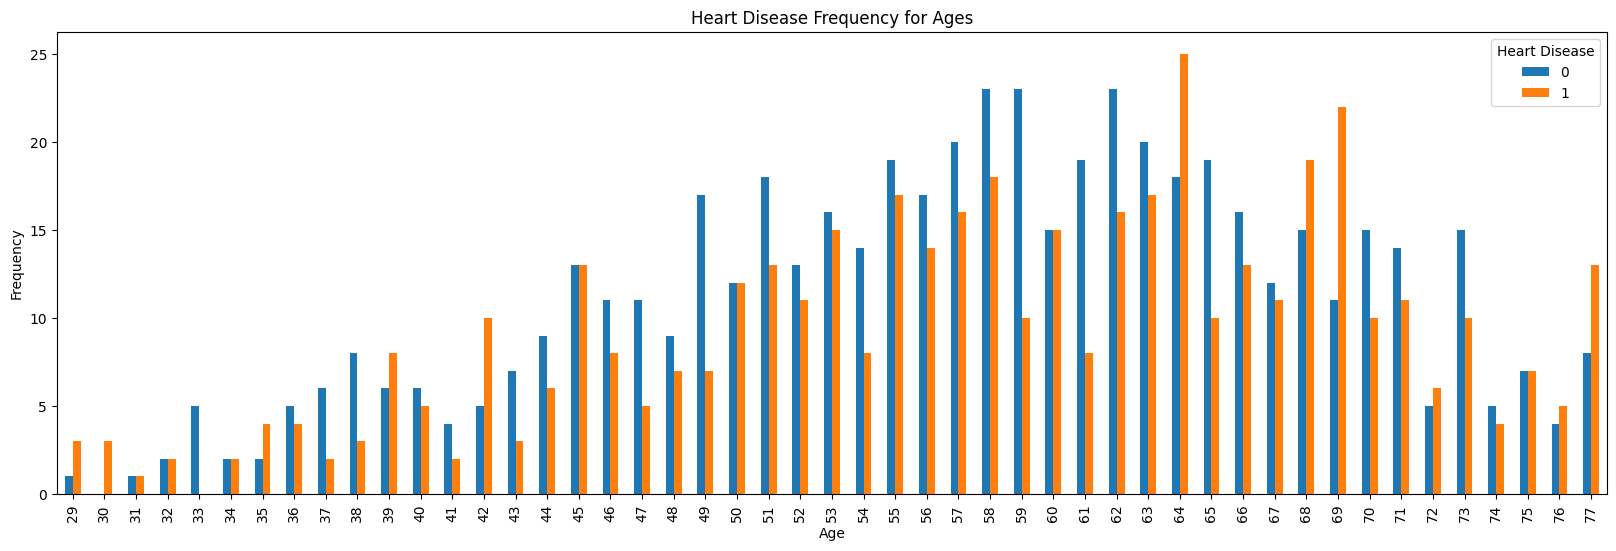

In [82]:
pd.crosstab(synthetic_data_coupGAN['Age'],synthetic_data_coupGAN['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

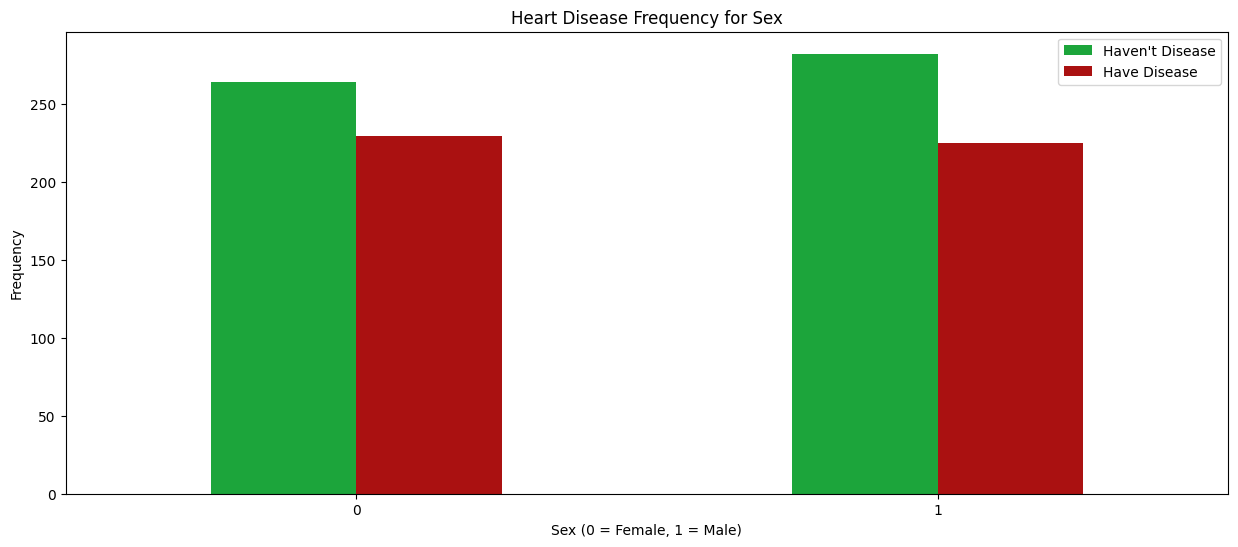

In [83]:
pd.crosstab(synthetic_data_coupGAN['Sex'],synthetic_data_coupGAN['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

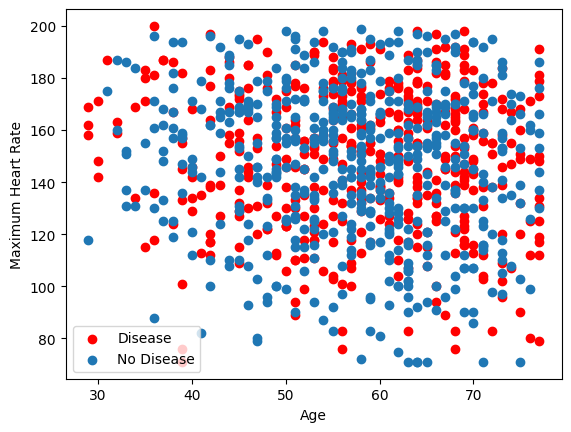

In [84]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_coupGAN.Age[synthetic_data_coupGAN['Heart Disease']==1], 
            y=synthetic_data_coupGAN['Max HR'][synthetic_data_coupGAN['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_coupGAN.Age[synthetic_data_coupGAN['Heart Disease']==0], 
            y=synthetic_data_coupGAN['Max HR'][synthetic_data_coupGAN['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


HR is all over the place tho

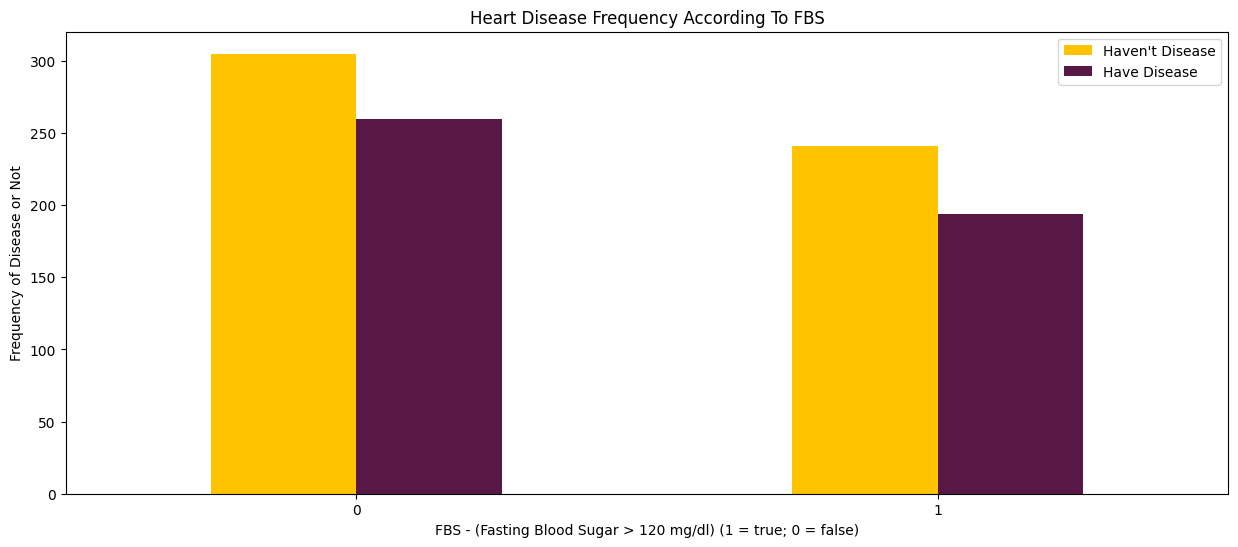

In [85]:
pd.crosstab(synthetic_data_coupGAN['FBS over 120'],synthetic_data_coupGAN['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

out of CTGAN, Coupola GAN and Gaussian Coupola synthetizers, by data exploration comparison to the original datset Gaussian Coupola syntetizer seems to have created the most realistic dataset.

The Gaussian Copula method can yield realistic synthetic datasets because it's particularly good at capturing and modeling the joint distribution of the variables in your dataset. It does so by modeling the marginal distribution of each variable and then using a copula to model their correlation structure. This can sometimes result in synthetic data that closely resembles the correlations and interactions in your original data, which might explain why it seems more realistic compared to other methods.

To create a synthetic dataset with a 50-50 gender ratio using the Gaussian Copula method, you can modify the metadata to specify that the Sex column should have a balanced distribution. However, sdv does not support direct manipulation of class proportions within the synthesizer itself. You would need to manually adjust the dataset after generation or use a different method to enforce this balance during generation.

An alternative approach would be to generate a synthetic dataset and then resample it to achieve the desired gender ratio:

Generate a large synthetic dataset with the Gaussian Copula method.
Split the synthetic dataset by gender.
Resample from each gender group to have an equal number of instances.
Combine the resampled groups back into a single dataset.

sdg - mitigating gender imbalance with Gaussian Coupola 

In [91]:


# Split the dataset by gender
male_data = synthetic_data_coupGauss[synthetic_data_coupGauss['Sex'] == 1]
female_data = synthetic_data_coupGauss[synthetic_data_coupGauss['Sex'] == 0]

# Resample to get a balanced dataset
balanced_male_data = male_data.sample(300)
balanced_female_data = female_data.sample(300)

# Combine the resampled groups
balanced_synthetic_data = pd.concat([balanced_male_data, balanced_female_data])

# Shuffle the dataset to mix male and female rows
balanced_synthetic_data = balanced_synthetic_data.sample(frac=1).reset_index(drop=True)

print(balanced_synthetic_data['Sex'].value_counts())  # Should be approximately balanced
print(balanced_synthetic_data.head())


Sex
0    300
1    300
Name: count, dtype: int64
   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   60    0  123          253             0            0     128   
1   58    0  124          386             0            2     181   
2   52    0  127          214             0            0     136   
3   59    1  123          199             1            2     152   
4   58    0  124          302             1            2     178   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            1.9                        0  ...     0     1   
1                1            0.2                        0  ...     0     0   
2                0            0.9                        1  ...     0     0   
3                1            2.2                        1  ...     0     0   
4                0            0.2                        0  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0

In [92]:
balanced_synthetic_data.head()


,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,60,0,123,253,0,0,128,0,1.9,0,...,0,1,0,1,0,0,0,0,1,0
1,58,0,124,386,0,2,181,1,0.2,0,...,0,0,0,1,1,0,1,0,0,0
2,52,0,127,214,0,0,136,0,0.9,1,...,0,0,0,1,0,0,1,1,1,0
3,59,1,123,199,1,2,152,1,2.2,1,...,0,0,0,1,1,0,1,1,0,0
4,58,0,124,302,1,2,178,0,0.2,0,...,0,0,1,0,1,0,0,1,0,1


In [93]:
balanced_synthetic_data['Heart Disease'].value_counts()

Heart Disease
0    365
1    235
Name: count, dtype: int64

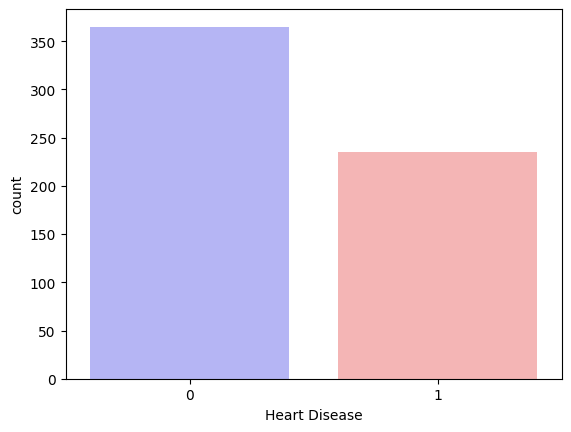

In [94]:
sns.countplot(x="Heart Disease", data=balanced_synthetic_data, palette="bwr")
plt.show()

In [95]:
percentage_presence = (balanced_synthetic_data['Heart Disease'] == 1).mean() * 100
percentage_absence = (balanced_synthetic_data['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 39.17%
Percentage of patients without heart disease: 60.83%


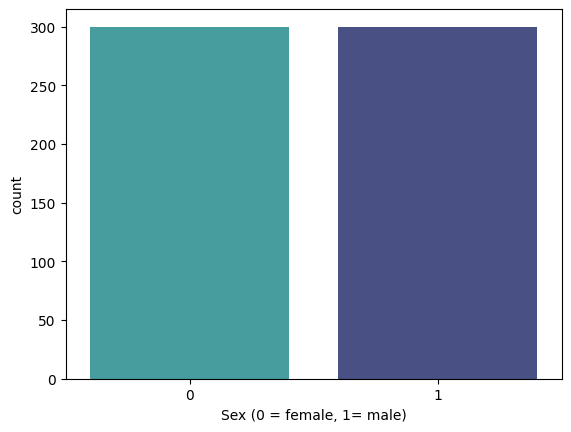

In [96]:
sns.countplot(x='Sex', data=balanced_synthetic_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [97]:
countFemale = len(balanced_synthetic_data[balanced_synthetic_data.Sex == 0])
countMale = len(balanced_synthetic_data[balanced_synthetic_data.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(balanced_synthetic_data.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(balanced_synthetic_data.Sex))*100)))

Percentage of Female Patients: 50.00%
Percentage of Male Patients: 50.00%


In [98]:
balanced_synthetic_data.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,54.613699,0.430137,123.364384,249.605479,0.136986,0.980822,155.493151,0.241096,1.050137,0.616438,0.139726,0.191781,0.306849,0.369863,0.690411,0.093151,0.301370,0.536986,0.386301,0.084932
1,56.025532,0.608511,123.574468,260.319149,0.136170,1.110638,144.276596,0.421277,1.596596,0.617021,0.110638,0.140426,0.268085,0.625532,0.455319,0.080851,0.493617,0.459574,0.536170,0.059574


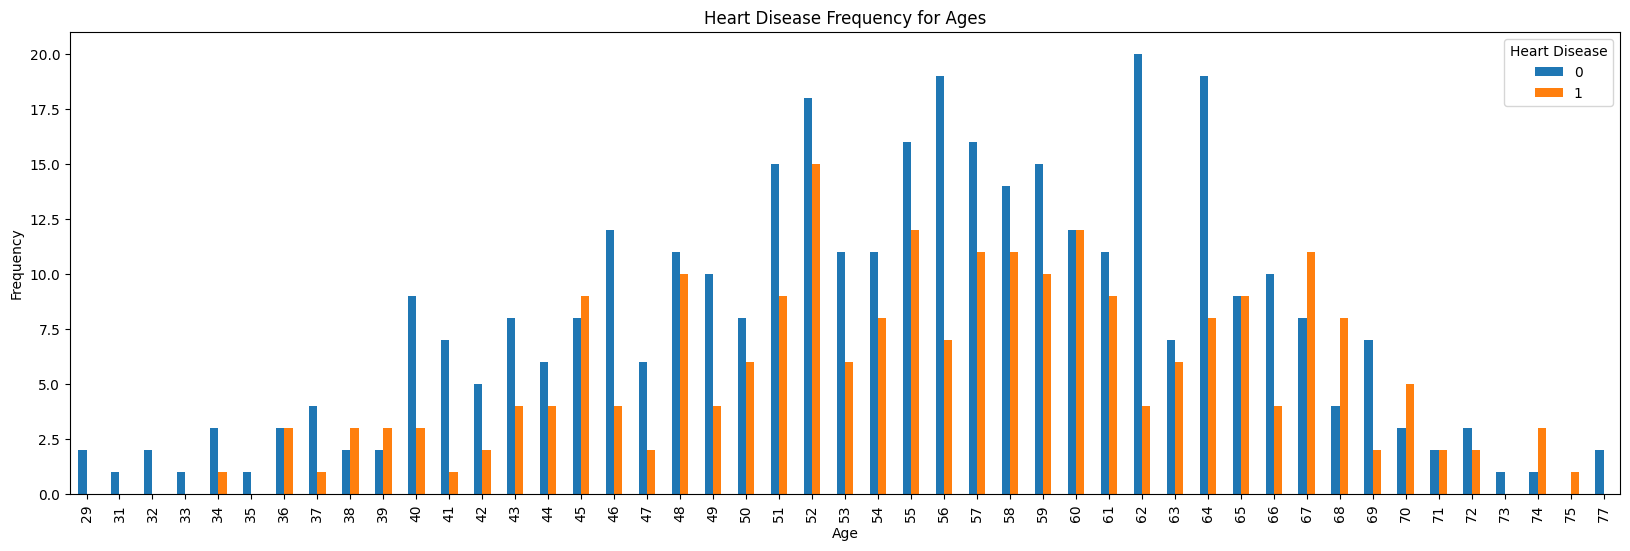

In [99]:
pd.crosstab(balanced_synthetic_data['Age'],balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

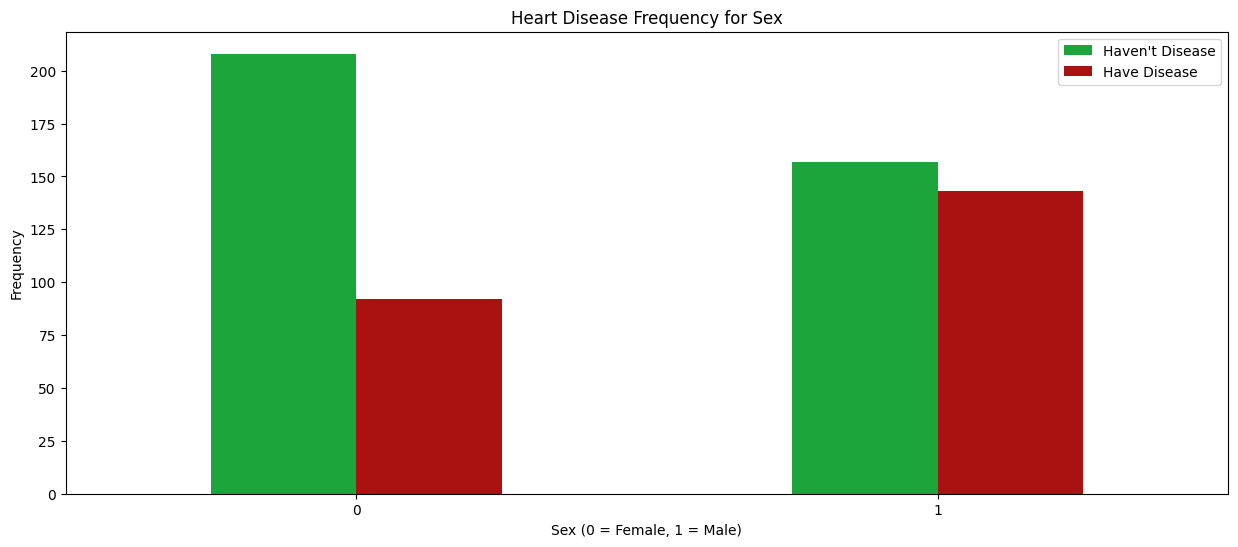

In [100]:
pd.crosstab(balanced_synthetic_data['Sex'],balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

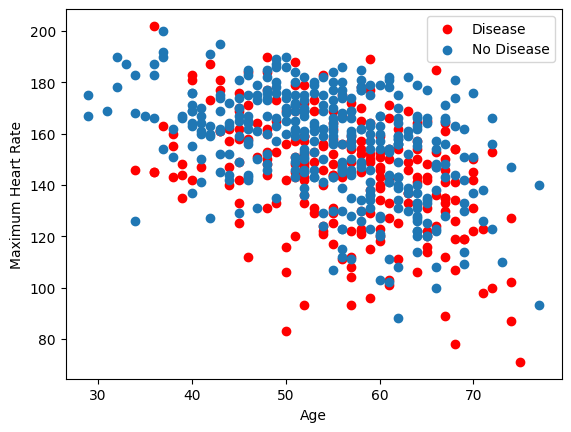

In [101]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=balanced_synthetic_data.Age[balanced_synthetic_data['Heart Disease']==1], 
            y=balanced_synthetic_data['Max HR'][balanced_synthetic_data['Heart Disease']==1], c="red")
plt.scatter(x=balanced_synthetic_data.Age[balanced_synthetic_data['Heart Disease']==0], 
            y=balanced_synthetic_data['Max HR'][balanced_synthetic_data['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


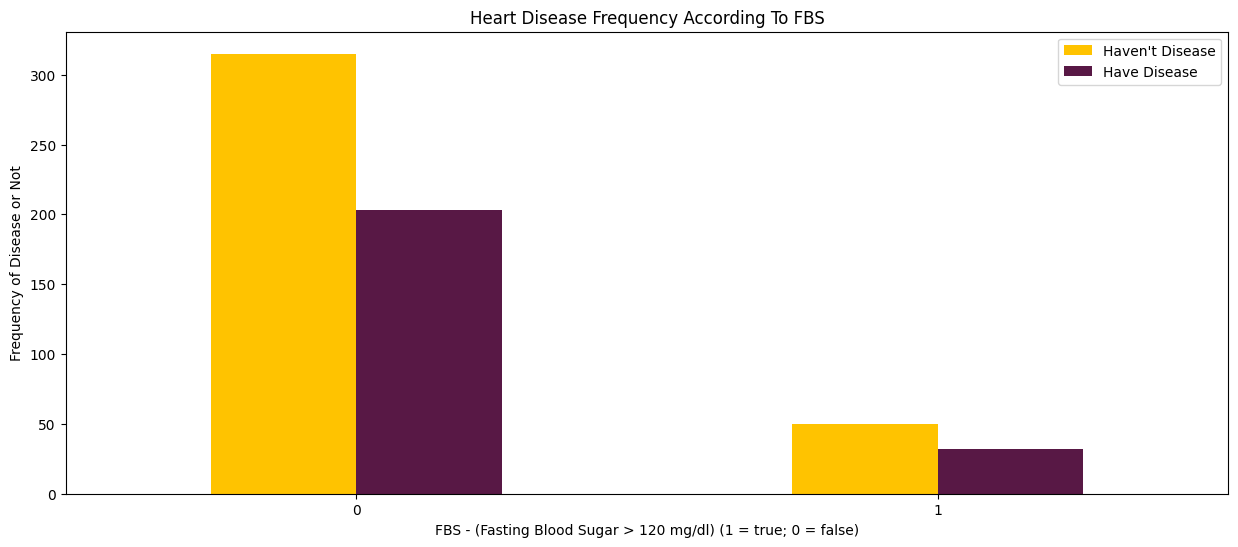

In [102]:
pd.crosstab(balanced_synthetic_data['FBS over 120'],balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

sdg - further balancing to mitigate disease presence imbalance of gender balanced gaussian coupola dataset

In [107]:
# Split the synthetic dataset by disease presence
disease_data = balanced_synthetic_data[balanced_synthetic_data['Heart Disease'] == 1]
no_disease_data = balanced_synthetic_data[balanced_synthetic_data['Heart Disease'] == 0]

# Calculate the minimum count to balance the classes
min_count = min(len(disease_data), len(no_disease_data))

# Resample to get balanced datasets
balanced_disease_data = disease_data.sample(min_count)
balanced_no_disease_data = no_disease_data.sample(min_count)

# Combine the resampled groups to have an equal representation
final_balanced_synthetic_data = pd.concat([balanced_disease_data, balanced_no_disease_data])

# Shuffle the dataset to mix the rows with and without disease
final_balanced_synthetic_data = final_balanced_synthetic_data.sample(frac=1).reset_index(drop=True)

print(final_balanced_synthetic_data['Heart Disease'].value_counts())  # Should be balanced
print(final_balanced_synthetic_data.head())

Heart Disease
1    235
0    235
Name: count, dtype: int64
   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   65    1  126          234             0            2     131   
1   64    0  123          245             0            2     140   
2   56    1  123          302             0            2     168   
3   62    0  123          322             0            0     156   
4   34    0  123          255             0            2     146   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            3.2                        1  ...     0     0   
1                1            1.1                        0  ...     0     0   
2                0            0.3                        0  ...     1     0   
3                0            1.9                        1  ...     0     0   
4                1            1.0                        1  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  s

In [108]:
final_balanced_synthetic_data.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,65,1,126,234,0,2,131,0,3.2,1,...,0,0,0,1,0,0,0,1,1,1
1,64,0,123,245,0,2,140,1,1.1,0,...,0,0,0,0,0,1,1,0,1,0
2,56,1,123,302,0,2,168,0,0.3,0,...,1,0,0,0,1,0,0,1,1,0
3,62,0,123,322,0,0,156,0,1.9,1,...,0,0,1,1,0,0,1,1,1,0
4,34,0,123,255,0,2,146,1,1.0,1,...,0,0,1,0,0,0,1,0,1,0


In [109]:
final_balanced_synthetic_data['Heart Disease'].value_counts()

Heart Disease
1    235
0    235
Name: count, dtype: int64

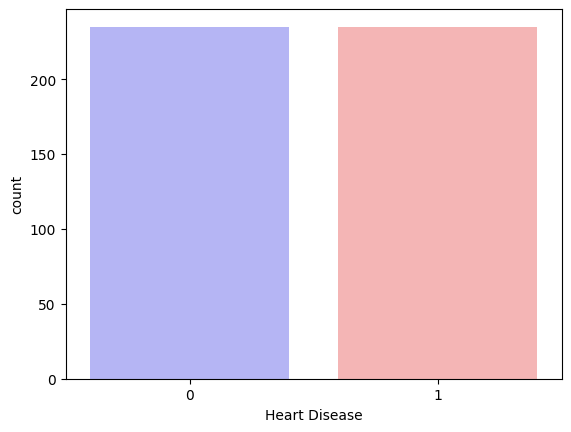

In [110]:
sns.countplot(x="Heart Disease", data=final_balanced_synthetic_data, palette="bwr")
plt.show()

In [111]:
percentage_presence = (final_balanced_synthetic_data['Heart Disease'] == 1).mean() * 100
percentage_absence = (final_balanced_synthetic_data['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 50.00%
Percentage of patients without heart disease: 50.00%


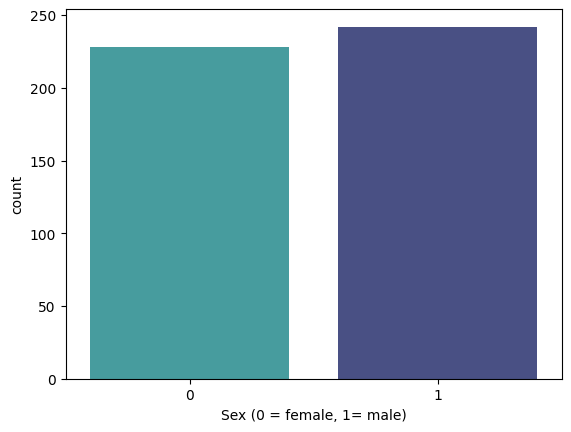

In [112]:
sns.countplot(x='Sex', data=final_balanced_synthetic_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [113]:
countFemale = len(final_balanced_synthetic_data[final_balanced_synthetic_data.Sex == 0])
countMale = len(final_balanced_synthetic_data[final_balanced_synthetic_data.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(final_balanced_synthetic_data.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(final_balanced_synthetic_data.Sex))*100)))

Percentage of Female Patients: 48.51%
Percentage of Male Patients: 51.49%


In [114]:
final_balanced_synthetic_data.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,54.097872,0.421277,123.327660,244.374468,0.153191,0.923404,155.804255,0.229787,1.095745,0.587234,0.136170,0.178723,0.340426,0.336170,0.697872,0.110638,0.297872,0.561702,0.391489,0.102128
1,56.025532,0.608511,123.574468,260.319149,0.136170,1.110638,144.276596,0.421277,1.596596,0.617021,0.110638,0.140426,0.268085,0.625532,0.455319,0.080851,0.493617,0.459574,0.536170,0.059574


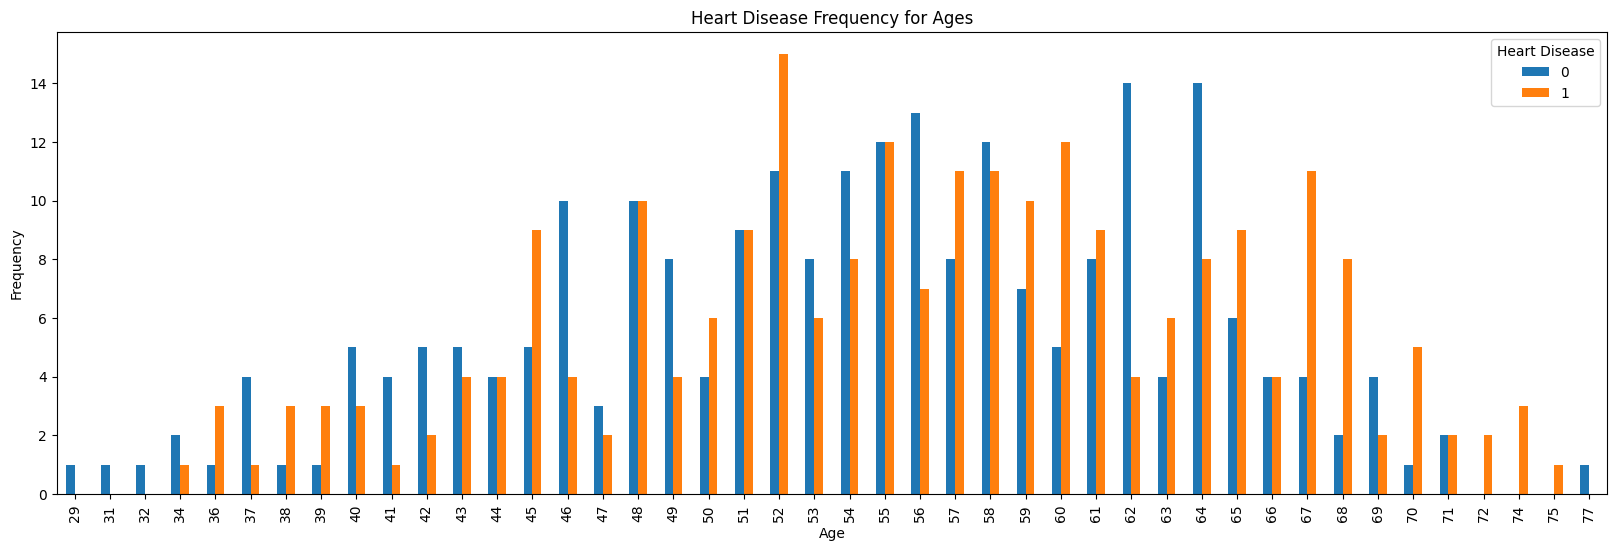

In [115]:
pd.crosstab(final_balanced_synthetic_data['Age'],final_balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

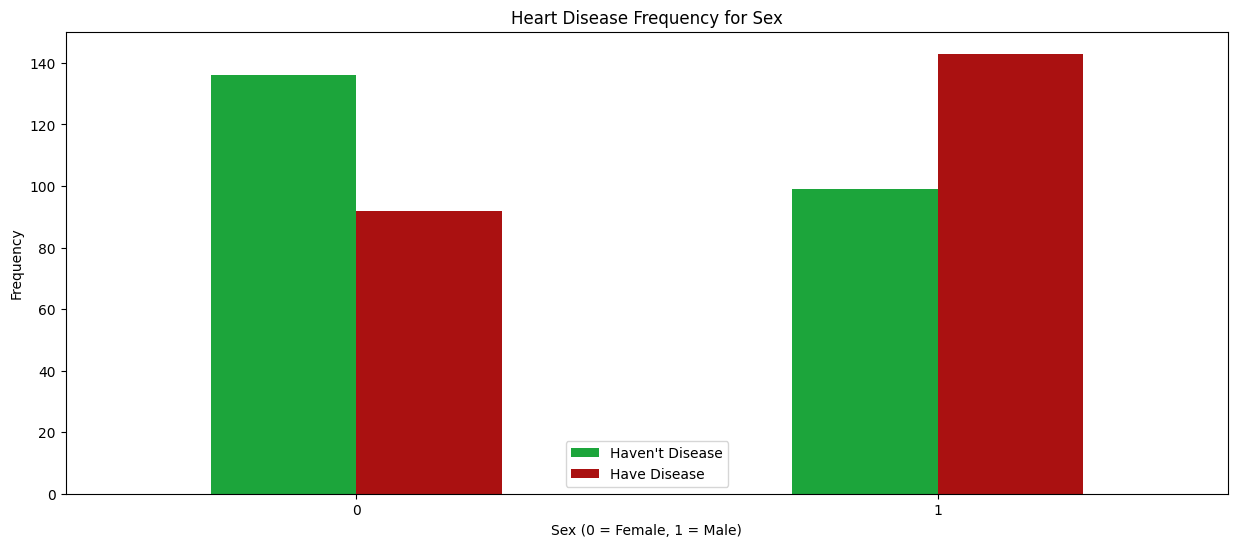

In [116]:
pd.crosstab(final_balanced_synthetic_data['Sex'],final_balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

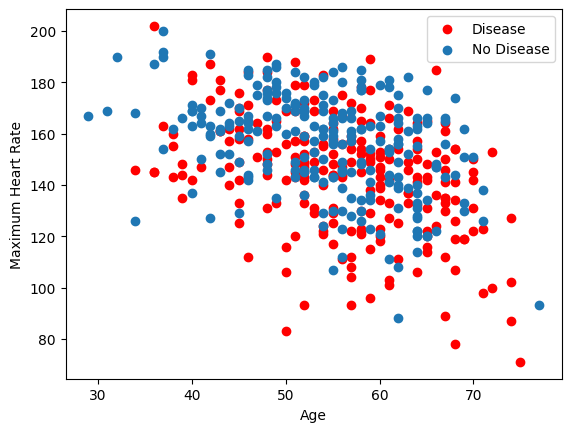

In [117]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=final_balanced_synthetic_data.Age[final_balanced_synthetic_data['Heart Disease']==1], 
            y=final_balanced_synthetic_data['Max HR'][final_balanced_synthetic_data['Heart Disease']==1], c="red")
plt.scatter(x=final_balanced_synthetic_data.Age[final_balanced_synthetic_data['Heart Disease']==0], 
            y=final_balanced_synthetic_data['Max HR'][final_balanced_synthetic_data['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


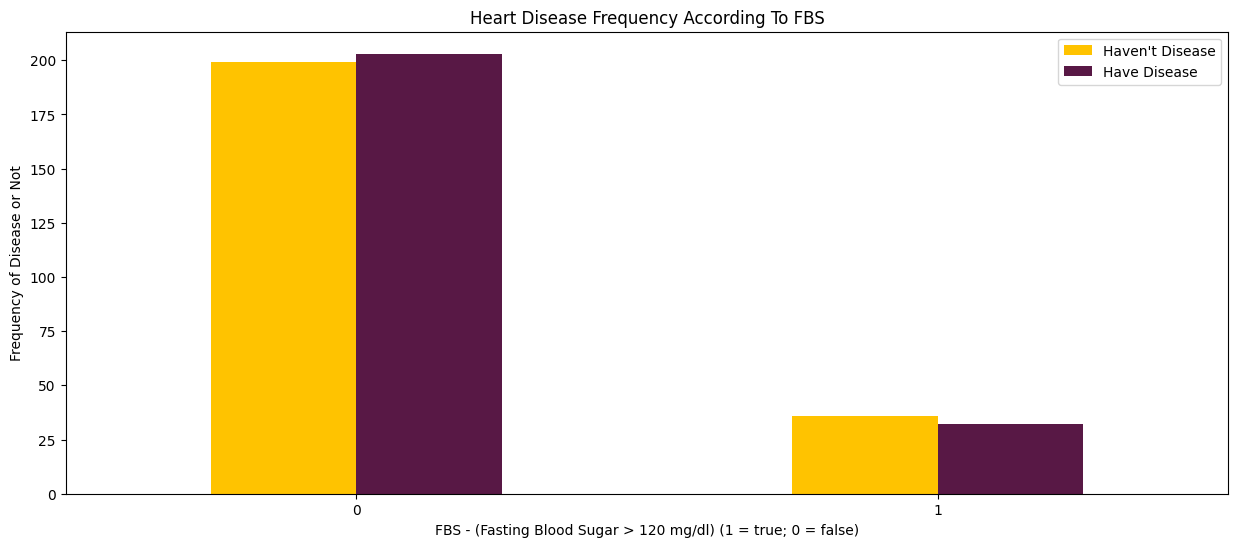

In [118]:
pd.crosstab(final_balanced_synthetic_data['FBS over 120'],final_balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

now balanced heart disease frequency per gender of gaussian coupola synthetic dataset

In [121]:
# Split the dataset into four groups
female_with_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 0) & (synthetic_data_coupGauss['Heart Disease'] == 1)]
female_without_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 0) & (synthetic_data_coupGauss['Heart Disease'] == 0)]
male_with_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 1) & (synthetic_data_coupGauss['Heart Disease'] == 1)]
male_without_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 1) & (synthetic_data_coupGauss['Heart Disease'] == 0)]

# Find the smallest group size
min_size = min(len(female_with_disease), len(female_without_disease),
               len(male_with_disease), len(male_without_disease))

# Resample the other groups to the size of the smallest group
female_with_disease = female_with_disease.sample(min_size)
female_without_disease = female_without_disease.sample(min_size)
male_with_disease = male_with_disease.sample(min_size)
male_without_disease = male_without_disease.sample(min_size)

# Combine the subsamples into one balanced dataset
balanced_df = pd.concat([female_with_disease, female_without_disease,
                         male_with_disease, male_without_disease])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [122]:
balanced_df.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,56,0,123,226,0,2,144,0,0.2,0,...,0,0,0,1,1,1,0,0,1,0
1,62,1,131,381,0,0,141,0,4.3,1,...,1,0,0,1,0,0,0,1,0,0
2,50,1,123,194,0,2,168,0,2.8,0,...,0,0,0,0,1,0,0,0,0,0
3,36,0,123,340,0,0,145,1,0.3,1,...,0,0,0,0,1,0,0,0,1,0
4,60,1,123,205,0,2,181,1,0.5,0,...,0,1,0,1,0,0,1,1,0,0


In [123]:
balanced_df['Heart Disease'].value_counts()

Heart Disease
1    192
0    192
Name: count, dtype: int64

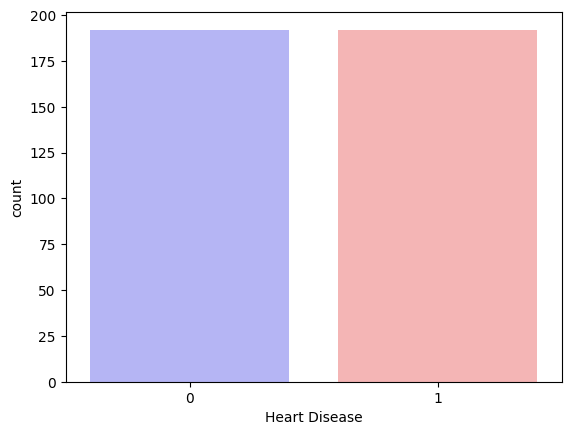

In [124]:
sns.countplot(x="Heart Disease", data=balanced_df, palette="bwr")
plt.show()

In [125]:
percentage_presence = (balanced_df['Heart Disease'] == 1).mean() * 100
percentage_absence = (balanced_df['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 50.00%
Percentage of patients without heart disease: 50.00%


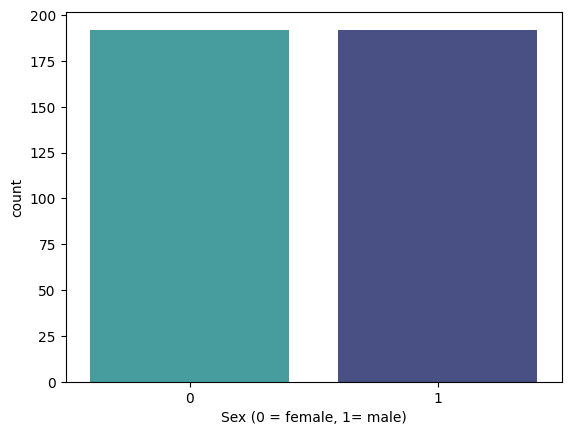

In [126]:
sns.countplot(x='Sex', data=balanced_df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [127]:
countFemale = len(balanced_df[balanced_df.Sex == 0])
countMale = len(balanced_df[balanced_df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(balanced_df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(balanced_df.Sex))*100)))

Percentage of Female Patients: 50.00%
Percentage of Male Patients: 50.00%


In [128]:
balanced_df.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,54.151042,0.5,123.359375,246.552083,0.125000,1.026042,155.848958,0.302083,1.083854,0.578125,0.114583,0.203125,0.338542,0.369792,0.651042,0.062500,0.380208,0.541667,0.380208,0.093750
1,55.864583,0.5,123.671875,258.552083,0.166667,1.109375,145.156250,0.421875,1.694271,0.635417,0.125000,0.156250,0.265625,0.614583,0.463542,0.067708,0.500000,0.432292,0.536458,0.072917


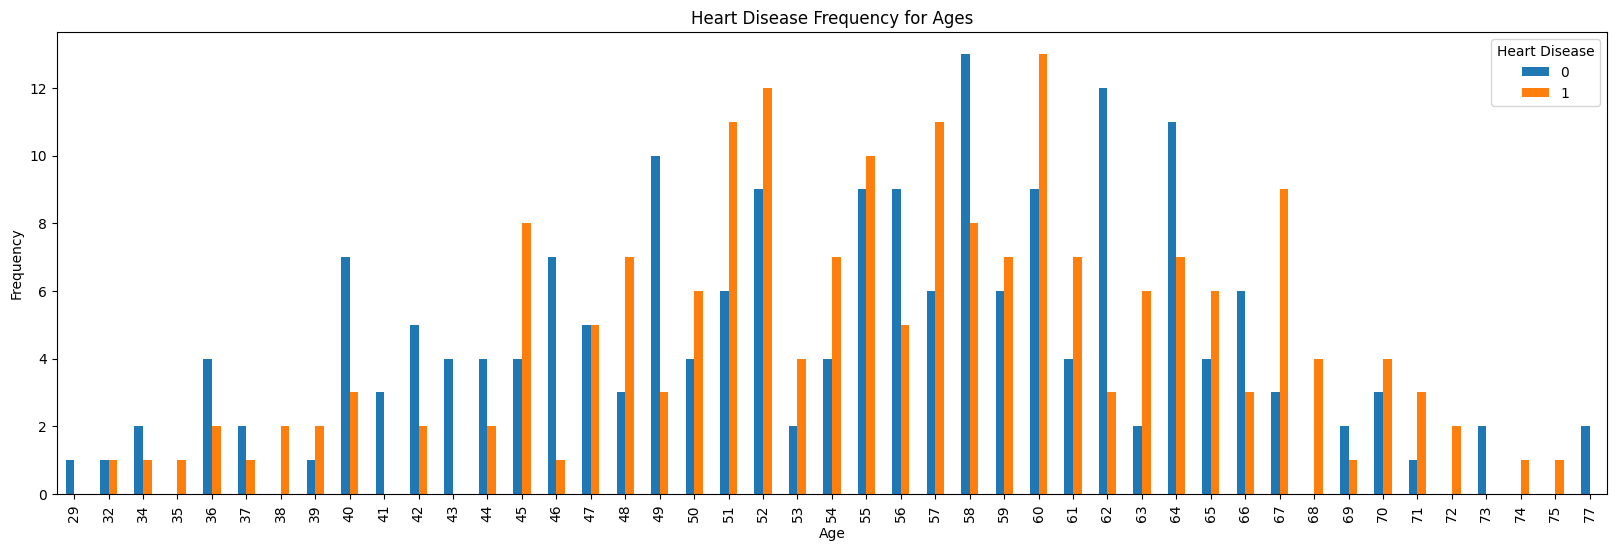

In [129]:
pd.crosstab(balanced_df['Age'], balanced_df['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

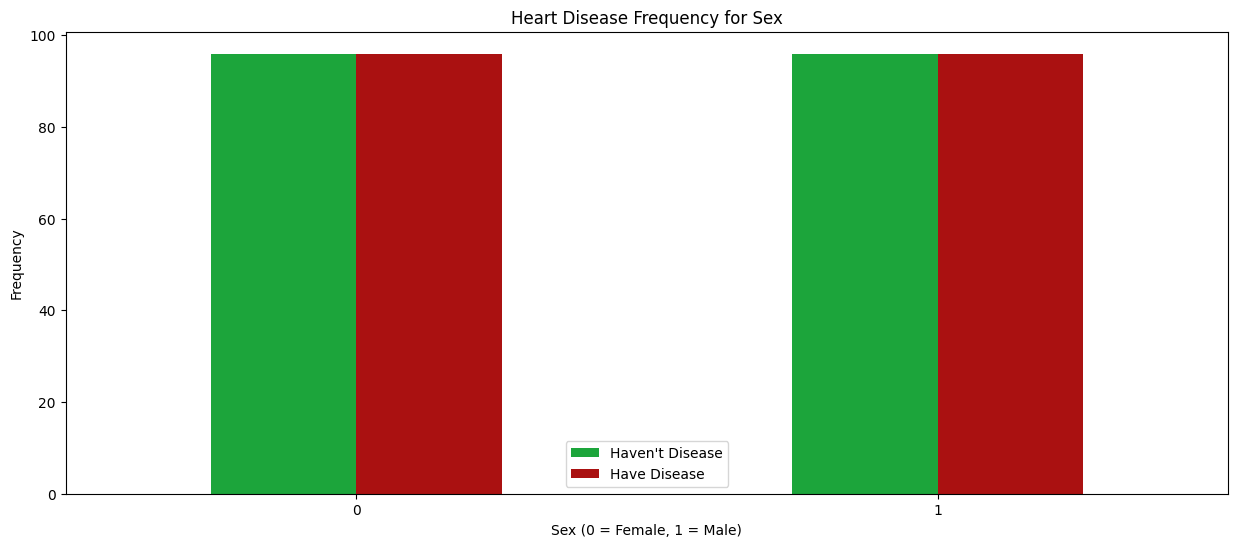

In [130]:
pd.crosstab(balanced_df['Sex'], balanced_df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

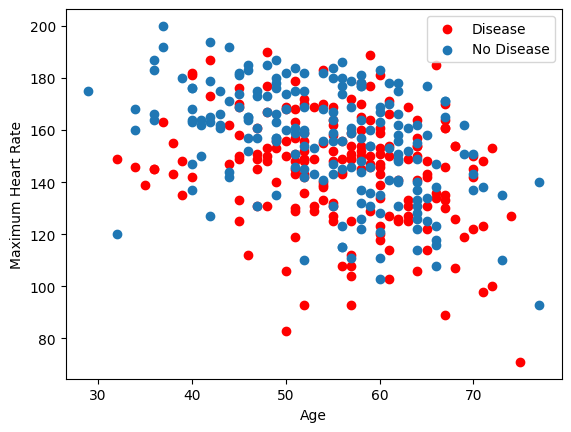

In [131]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=balanced_df.Age[balanced_df['Heart Disease']==1], 
            y=balanced_df['Max HR'][balanced_df['Heart Disease']==1], c="red")
plt.scatter(x=balanced_df.Age[balanced_df['Heart Disease']==0], 
            y=balanced_df['Max HR'][balanced_df['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


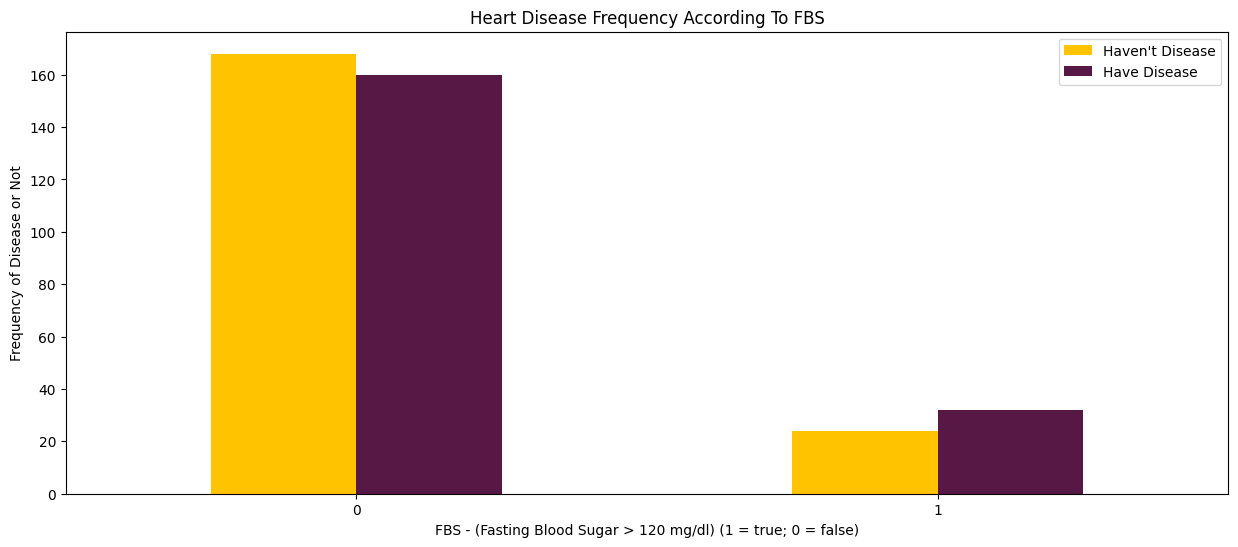

In [132]:
pd.crosstab(balanced_df['FBS over 120'],balanced_df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Training classifers with Synthetic data test with real data 